This notebook is used to run runtime or accuracy comparison experiments.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import itertools
import random
import operator

import os, sys
sys.path.append(os.path.join("../"))

# our library
from src.mcmc_sat import models, mcmc, smt

## Triangle

In [2]:
num_samples = np.arange(100, 25001, step=5000)

In [3]:
# Timeout
TIMEOUT = 60*5 # seconds (5min)

(g, num_bits, num_vars) = models.get_triangle_sat()
(s, num_vars) = models.get_triangle_smt()
backends = ['spur', 'cmsgen', 'megasampler']
traces_triangle = [
    (samples,
        [[mcmc.sample_mh_trace_from_z3_model(
            backend=backend,
            z3_problem=g,
            num_bits=num_bits,
            num_vars=num_vars,
            timeout_sampler=TIMEOUT,
            num_samples=samples) 
        if backend in ['spur','cmsgen']
        else mcmc.sample_mh_trace_from_z3_model(
                backend=backend,
                z3_problem=s,
                algo='MeGAb', #  MeGA not working
                timeout_sampler=TIMEOUT,
                reweight_samples=True,
                num_samples=samples)
        for rep in range(3)] for backend in backends ]) # we run each experiment 3 times
    for samples in num_samples]

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	47/47/0
independent support size:  	0
clauses (all/long/binary/unit): 151/75/69/7
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8366 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8366 MB

Sample #1 of 4 is already a complete assignment.  Continuing...
Completing sample #2 of 4 which has 4 variables unset and 10 samples.
Completing sample #3 of 4 which has 11 variables unset and 22 samples.
Completing sample #4 of 4 which has 8 variables unset and 17 samples.
STAGE #2 - COMPLETE


variables (total / active / free)	47

megasampler(__cxa_throw+0x9d)[0x5e2c90086fa1]
megasampler(+0x15a69)[0x5e2c90087a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x5e2c90090925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x5e2c900b3e9b]
megasampler(main+0x175)[0x5e2c90088095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x77e482e2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x77e482e2a28b]
megasampler(_start+0x25)[0x5e2c90088145]
megasampler(__cxa_throw+0x9d)[0x642c8483dfa1]
megasampler(+0x15a69)[0x642c8483ea69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x642c84847925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x642c8486ae9b]
megasampler(main+0x175)[0x642c8483f095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7e1cf0a2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7e1cf0a2a28b]
megasampler(_start+0x25)[0x642c8483f145]
megasampler(__cxa_throw+0x9d)[0x5eed55f60fa1]
megasampler(+0x15a69)[0x5eed55f61a69]
megasampler(_ZN7Sampler11start_epoch

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 7
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 3
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
Termination due to: index out of bounds
---------SOLVING STATISTICS--------
do_epoch time: 0.00202648
epoch time: 0.0315654
grow_seed time: 0.00150443
initial_solving time: 0.0018428
output time: 3.2947e-05
start_epoch time: 0.0295181
total time: 0.0345247
Epochs: 16
MAX-SMT calls: 1
SMT calls: 17
Assignments considered (with repetitions): 16
Models (with repetitions): 16
Unique models (# samples in file): 16
-----------------------------------
Samples have been reweighted. The sampler generated 16 and the reweighting process has generated 96 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3

megasampler(__cxa_throw+0x9d)[0x5fd0867f5fa1]
megasampler(+0x15a69)[0x5fd0867f6a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x5fd0867ff925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x5fd086822e9b]
megasampler(main+0x175)[0x5fd0867f7095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x73ac2ec2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x73ac2ec2a28b]
megasampler(_start+0x25)[0x5fd0867f7145]
megasampler(__cxa_throw+0x9d)[0x60bb3ad5bfa1]
megasampler(+0x15a69)[0x60bb3ad5ca69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x60bb3ad65925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x60bb3ad88e9b]
megasampler(main+0x175)[0x60bb3ad5d095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7f091362a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7f091362a28b]
megasampler(_start+0x25)[0x60bb3ad5d145]
megasampler(__cxa_throw+0x9d)[0x63d5ae32cfa1]
megasampler(+0x15a69)[0x63d5ae32da69]
megasampler(_ZN7Sampler11start_epoch

Formula is satisfiable
Termination due to: index out of bounds
---------SOLVING STATISTICS--------
do_epoch time: 0.0265652
epoch time: 0.0462572
grow_seed time: 0.00088753
initial_solving time: 0.00101133
output time: 0.00016701
start_epoch time: 0.0196757
total time: 0.0483216
Epochs: 16
MAX-SMT calls: 1
SMT calls: 17
Assignments considered (with repetitions): 1632
Models (with repetitions): 1632
Unique models (# samples in file): 16
-----------------------------------
Samples have been reweighted. The sampler generated 16 and the reweighting process has generated 5088 (according to the unnormalized posterior probability specified in the input parameter `f`).

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	47/47/0
independent support size:  	0
clauses (all/long/binary/unit): 151/75/69/7
Initialize c

megasampler(__cxa_throw+0x9d)[0x6251f380ffa1]
megasampler(+0x15a69)[0x6251f3810a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x6251f3819925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x6251f383ce9b]
megasampler(main+0x175)[0x6251f3811095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x71c196c2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x71c196c2a28b]
megasampler(_start+0x25)[0x6251f3811145]
megasampler(__cxa_throw+0x9d)[0x58c43bc4bfa1]
megasampler(+0x15a69)[0x58c43bc4ca69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x58c43bc55925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x58c43bc78e9b]
megasampler(main+0x175)[0x58c43bc4d095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x723249c2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x723249c2a28b]
megasampler(_start+0x25)[0x58c43bc4d145]


Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 7
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 3
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
Termination due to: index out of bounds
---------SOLVING STATISTICS--------
do_epoch time: 0.0265253
epoch time: 0.0456842
grow_seed time: 0.000904938
initial_solving time: 0.00100419
output time: 0.000151238
start_epoch time: 0.0191423
total time: 0.0477191
Epochs: 16
MAX-SMT calls: 1
SMT calls: 17
Assignments considered (with repetitions): 1632
Models (with repetitions): 1632
Unique models (# samples in file): 16
-----------------------------------
Samples have been reweighted. The sampler generated 16 and the reweighting process has generated 10096 (according to the unnormalized posterior probability specified in the input parameter `f`).

Using default filename: "spur_i

megasampler(__cxa_throw+0x9d)[0x5e7cebdb7fa1]
megasampler(+0x15a69)[0x5e7cebdb8a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x5e7cebdc1925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x5e7cebde4e9b]
megasampler(main+0x175)[0x5e7cebdb9095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7a3f6c82a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7a3f6c82a28b]
megasampler(_start+0x25)[0x5e7cebdb9145]


Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	47/47/0
independent support size:  	0
clauses (all/long/binary/unit): 151/75/69/7
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8342 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8342 MB

Sample #1 of 4 is already a complete assignment.  Continuing...
Completing sample #2 of 4 which has 4 variables unset and 1859 samples.
Completing sample #3 of 4 which has 11 variables unset and 2877 samples.
Completing sample #4 of 4 which has 8 variables unset and 2824 samples.
STAGE #2 - COMPLETE


variables (total / active / fr

megasampler(__cxa_throw+0x9d)[0x642237a8afa1]
megasampler(+0x15a69)[0x642237a8ba69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x642237a94925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x642237ab7e9b]
megasampler(main+0x175)[0x642237a8c095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7a652f62a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7a652f62a28b]
megasampler(_start+0x25)[0x642237a8c145]
megasampler(__cxa_throw+0x9d)[0x63b953f1bfa1]
megasampler(+0x15a69)[0x63b953f1ca69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x63b953f25925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x63b953f48e9b]
megasampler(main+0x175)[0x63b953f1d095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x79634522a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x79634522a28b]
megasampler(_start+0x25)[0x63b953f1d145]


Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 7
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 3
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
Termination due to: index out of bounds
---------SOLVING STATISTICS--------
do_epoch time: 0.0265114
epoch time: 0.0456292
grow_seed time: 0.000888033
initial_solving time: 0.00093893
output time: 0.000174704
start_epoch time: 0.0191013
total time: 0.0475757
Epochs: 16
MAX-SMT calls: 1
SMT calls: 17
Assignments considered (with repetitions): 1632
Models (with repetitions): 1632
Unique models (# samples in file): 16
-----------------------------------
Samples have been reweighted. The sampler generated 16 and the reweighting process has generated 15088 (according to the unnormalized posterior probability specified in the input parameter `f`).

Using default filename: "spur_i

megasampler(__cxa_throw+0x9d)[0x606d85974fa1]
megasampler(+0x15a69)[0x606d85975a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x606d8597e925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x606d859a1e9b]
megasampler(main+0x175)[0x606d85976095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7989fca2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7989fca2a28b]
megasampler(_start+0x25)[0x606d85976145]


Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	47/47/0
independent support size:  	0
clauses (all/long/binary/unit): 151/75/69/7
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8322 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8322 MB

Sample #1 of 4 is already a complete assignment.  Continuing...
Completing sample #2 of 4 which has 4 variables unset and 2516 samples.
Completing sample #3 of 4 which has 11 variables unset and 3789 samples.
Completing sample #4 of 4 which has 8 variables unset and 3713 samples.
STAGE #2 - COMPLETE


variables (total / active / fr

megasampler(__cxa_throw+0x9d)[0x5649768d6fa1]
megasampler(+0x15a69)[0x5649768d7a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x5649768e0925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x564976903e9b]
megasampler(main+0x175)[0x5649768d8095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x72564922a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x72564922a28b]
megasampler(_start+0x25)[0x5649768d8145]
megasampler(__cxa_throw+0x9d)[0x56ac04e0cfa1]
megasampler(+0x15a69)[0x56ac04e0da69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x56ac04e16925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x56ac04e39e9b]
megasampler(main+0x175)[0x56ac04e0e095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x791e30a2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x791e30a2a28b]
megasampler(_start+0x25)[0x56ac04e0e145]


Formula is satisfiable
Termination due to: index out of bounds
---------SOLVING STATISTICS--------
do_epoch time: 0.0261759
epoch time: 0.0452795
grow_seed time: 0.000810648
initial_solving time: 0.00108444
output time: 0.000150152
start_epoch time: 0.0190893
total time: 0.0473875
Epochs: 16
MAX-SMT calls: 1
SMT calls: 17
Assignments considered (with repetitions): 1632
Models (with repetitions): 1632
Unique models (# samples in file): 16
-----------------------------------
Samples have been reweighted. The sampler generated 16 and the reweighting process has generated 20096 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 7
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 3
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
Terminat

megasampler(__cxa_throw+0x9d)[0x59a42dc32fa1]
megasampler(+0x15a69)[0x59a42dc33a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x59a42dc3c925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x59a42dc5fe9b]
megasampler(main+0x175)[0x59a42dc34095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7bdf18e2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7bdf18e2a28b]
megasampler(_start+0x25)[0x59a42dc34145]


megasampler(__cxa_throw+0x9d)[0x580fbc1a9fa1]
megasampler(+0x15a69)[0x580fbc1aaa69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x580fbc1b3925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x580fbc1d6e9b]
megasampler(main+0x175)[0x580fbc1ab095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x72d31742a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x72d31742a28b]
megasampler(_start+0x25)[0x580fbc1ab145]


Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	47/47/0
independent support size:  	0
clauses (all/long/binary/unit): 151/75/69/7
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	4440 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	4440 MB

Sample #1 of 4 is already a complete assignment.  Continuing...
Completing sample #2 of 4 which has 4 variables unset and 2545 samples.
Completing sample #3 of 4 which has 11 variables unset and 3709 samples.
Completing sample #4 of 4 which has 8 variables unset and 3719 samples.
STAGE #2 - COMPLETE


variables (total / active / fr

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	44/44/0
independent support size:  	0
clauses (all/long/binary/unit): 138/66/65/7
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	4437 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	4437 MB

Sample #1 of 3 is already a complete assignment.  Continuing...
Completing sample #2 of 3 which has 4 variables unset and 2494 samples.
Completing sample #3 of 3 which has 8 variables unset and 3814 samples.
STAGE #2 - COMPLETE


variables (total / active / free)	44/44/0
clauses (removed) 		138 (0)
decisions 				10
conflicts 				0


c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 20100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sam

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 20100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sam

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 20100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sam

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 7
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 3
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
Termination due to: index out of bounds
---------SOLVING STATISTICS--------
do_epoch time: 0.0318323
epoch time: 0.057901
grow_seed time: 0.00113006
initial_solving time: 0.00171555
output time: 0.000191103
start_epoch time: 0.0260492
total time: 0.0606618
Epochs: 16
MAX-SMT calls: 1
SMT calls: 17
Assignments considered (with repetitions): 1632
Models (with repetitions): 1632
Unique models (# samples in file): 16
-----------------------------------
Samples have been reweighted. The sampler generated 16 and the reweighting process has generated 20096 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_i

megasampler(__cxa_throw+0x9d)[0x6438ca5d2fa1]
megasampler(+0x15a69)[0x6438ca5d3a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x6438ca5dc925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x6438ca5ffe9b]
megasampler(main+0x175)[0x6438ca5d4095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x76451342a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x76451342a28b]
megasampler(_start+0x25)[0x6438ca5d4145]
megasampler(__cxa_throw+0x9d)[0x566cd50c8fa1]
megasampler(+0x15a69)[0x566cd50c9a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x566cd50d2925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x566cd50f5e9b]
megasampler(main+0x175)[0x566cd50ca095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7a90edc2a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7a90edc2a28b]
megasampler(_start+0x25)[0x566cd50ca145]


Formula is satisfiable
Termination due to: index out of bounds
---------SOLVING STATISTICS--------
do_epoch time: 0.0263351
epoch time: 0.0458477
grow_seed time: 0.000836261
initial_solving time: 0.00101111
output time: 0.000148656
start_epoch time: 0.0194965
total time: 0.0479181
Epochs: 16
MAX-SMT calls: 1
SMT calls: 17
Assignments considered (with repetitions): 1632
Models (with repetitions): 1632
Unique models (# samples in file): 16
-----------------------------------
Samples have been reweighted. The sampler generated 16 and the reweighting process has generated 20096 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 7
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 3
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
Terminat

megasampler(__cxa_throw+0x9d)[0x590490191fa1]
megasampler(+0x15a69)[0x590490192a69]
megasampler(_ZN7Sampler11start_epochEv+0x1b5)[0x59049019b925]
megasampler(_ZN4MeGA11regular_runERN2z37contextERKNS_4argsE+0x2eb)[0x5904901bee9b]
megasampler(main+0x175)[0x590490193095]
/lib/x86_64-linux-gnu/libc.so.6(+0x2a1ca)[0x7fafad22a1ca]
/lib/x86_64-linux-gnu/libc.so.6(__libc_start_main+0x8b)[0x7fafad22a28b]
megasampler(_start+0x25)[0x590490193145]


In [4]:
# Analytical solution
p_x0 = lambda x: 1/4
p_x1 = lambda x: 1/4
p_x0x1 = lambda x: sum([p_x0(i)*p_x1(j) if i+j == x else 0 for i in range(4) for j in range(4)])

### Mean convergence experiments (absolute distance)

In [5]:
def p_est(trace, var_name, outcome):
    return np.mean(trace[var_name] == outcome)
data_triangle = {
    'samples':  [],
    'backend':  [],
    'var_name': [],
    'err_mean_mean': [],
    'err_mean_var': []
}
for (samples, traces) in traces_triangle:
    for (backend, trace_reps) in zip(backends, traces):
        for (f, var_name) in zip([p_x0, p_x1, p_x0x1],['x0','x1','x2']):
            outcomes = range(4) if var_name != 'x2' else range(6)
            err_outcome_means = [np.mean([np.abs(p_est(trace.posterior.sel(chain=0),var_name, o).item() - f(o)) for o in outcomes]) for trace in trace_reps]
            data_triangle['samples'].append(samples)
            data_triangle['backend'].append(backend)
            data_triangle['var_name'].append(var_name)
            data_triangle['err_mean_mean'].append(np.mean(err_outcome_means))
            data_triangle['err_mean_var'].append(np.var(err_outcome_means))
df_triangle = pd.DataFrame(data_triangle)

In [6]:
df_triangle[(df_triangle.samples == 5100) & (df_triangle.backend == 'spur')]

,samples,backend,var_name,err_mean_mean,err_mean_var
9,5100,spur,x0,0.005458,4.128754e-06
10,5100,spur,x1,0.004837,1.674570e-06
11,5100,spur,x2,0.004382,2.207722e-07


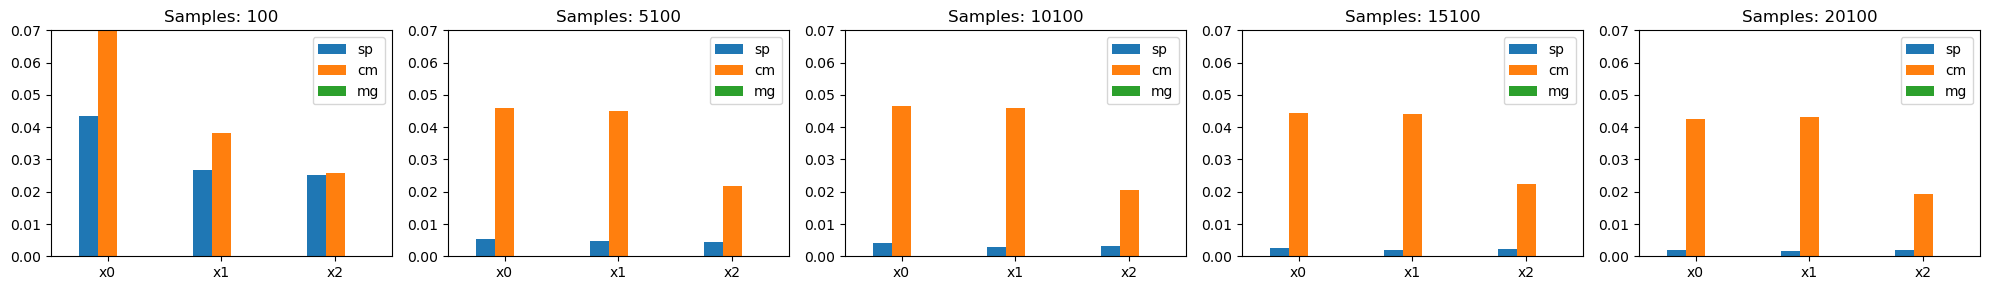

In [7]:
fig, axs = plt.subplots(1,len(num_samples),figsize=(20,3))
for (s,a) in zip(num_samples, axs):
    data = {b: [] for b in backends}
    for b in backends:
        data[b] = df_triangle[(df_triangle.samples == s) & (df_triangle.backend == b)].err_mean_mean.values
    df_temp = pd.DataFrame(data)
    ax = df_temp.plot.bar(ax=a)
    variables = df_triangle.var_name.unique()
    ax.set_xticks(range(len(variables)), variables,rotation=0)
    ax.set_ylim((0,0.07))
    ax.legend(['sp','cm','mg'])
    ax.set_title(f'Samples: {s}');

In [8]:
df_triangle[(df_triangle.var_name == 'x0') & (df_triangle.backend == 'spur')]

,samples,backend,var_name,err_mean_mean,err_mean_var
0,100,spur,x0,0.043333,0.000106
9,5100,spur,x0,0.005458,0.000004
18,10100,spur,x0,0.004125,0.000002
27,15100,spur,x0,0.002494,0.000001
36,20100,spur,x0,0.002073,0.000001


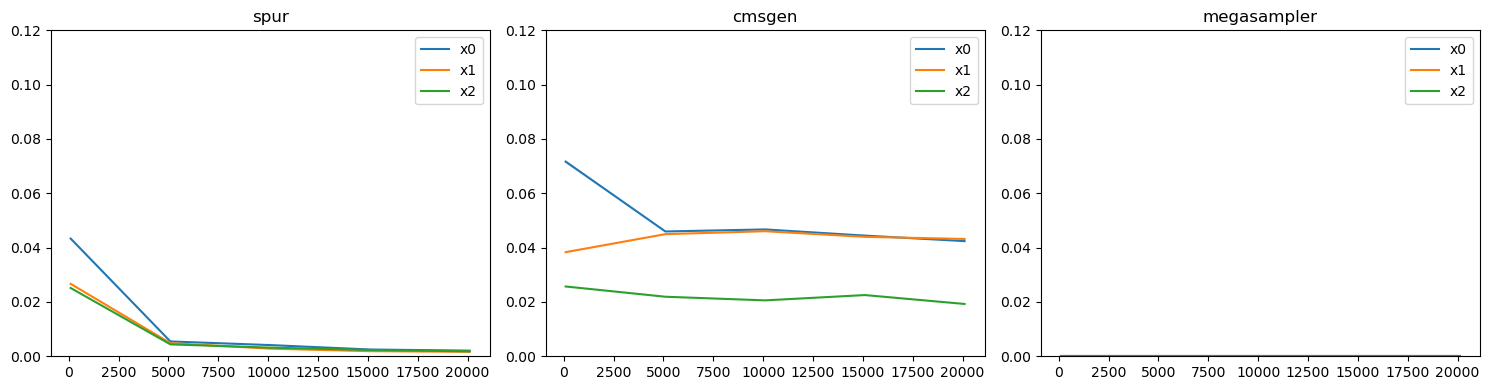

In [9]:
fig, axs = plt.subplots(1,len(backends),figsize=(15,4))

for (ax, b) in zip(axs, backends):
    ys = [(vn, 
           df_triangle[(df_triangle.var_name == vn) & (df_triangle.backend == b)].err_mean_mean.values,
           df_triangle[(df_triangle.var_name == vn) & (df_triangle.backend == b)].err_mean_var.values) for vn in ['x0','x1','x2']]
    for (vn, y, y_var) in ys:
        ax.plot(num_samples, y, label=vn)
        ax.fill_between(num_samples, y-y_var, y+y_var, alpha=0.2)
    ax.set_ylim((0,0.12))
    ax.set_title(f'{b}')
    ax.legend();

## DB CACM

In [10]:
num_samples = np.arange(100, 10000, step=2000)
TIMEOUT = 60*10 # seconds (10min)

(g, num_bits, num_vars) = models.get_db_cacm_sat()
(s, num_vars) = models.get_db_cacm_smt()
backends = ['spur', 'cmsgen', 'megasampler']
traces_db_cacm = [ 
        (samples, 
    [[mcmc.sample_mh_trace_from_z3_model(backend=backend,
                                       z3_problem=g,
                                       num_bits=num_bits,
                                       num_vars=num_vars,
                                       timeout_sampler=TIMEOUT,
                                       num_samples=samples)
    if backend in ['spur','cmsgen']
    else mcmc.sample_mh_trace_from_z3_model(
            backend=backend,
            z3_problem=s,
            timeout_sampler=TIMEOUT,
            reweight_samples=True,
            num_samples=samples)
    for rep in range(3)] for backend in backends ]) # we run each experiment 3 times
    for samples in num_samples]

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1602/1602/0
independent support size:  	0
clauses (all/long/binary/unit): 7498/5945/1494/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8384 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	8384 MB

Completing sample #1 of 23 which has 48 variables unset and 1 sample.
Sample #2 of 23 is already a complete assignment.  Continuing...
Completing sample #3 of 23 which has 41 variables unset and 1 sample.
Completing sample #4 of 23 which has 33 variables unset and 3 samples.
Completing sample #5 of 23 which has 65 variabl

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1620/1620/0
independent support size:  	0
clauses (all/long/binary/unit): 7556/5969/1528/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1398 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1398 MB

Sample #1 of 11 is already a complete assignment.  Continuing...
Completing sample #2 of 11 which has 44 variables unset and 4 samples.
Completing sample #3 of 11 which has 48 variables unset and 1 sample.
Completing sample #4 of 11 which has 43 variables unset and 2 samples.
Completing sample #5 of 11 which has 74 variables unset and 1 sample.
Completing sample #6 of 11 which has 28 variables unset and 1 sample.
Completing sample #7 of 11 which has 51 variables unset and 1 sample.
Completing sample #8 of 11 which has 28 variables unset and 2 samples.
Completing sample #9 of 11 which has 53 variables unset and 1 sample.
Completing sample #10 of 11 which has 36 variables unset and 1 sample.
Completing sample #11 of 11 which has 43 variables unset and 1 sample.
STAGE #2 - COMPLETE


variab

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1601/1601/0
independent support size:  	0
clauses (all/long/binary/unit): 7487/5932/1496/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1254 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1254 MB

Sample #1 of 35 is already a complete assignment.  Continuing...
Completing sample #2 of 35 which has 112 variables unset and 1 sample.
Completing sample #3 of 35 which has 79 variables unset and 1 sample.
Completing sample #4 of 35 which has 157 variables unset and 1 sample.
Completing sample #5 of 35 which has 85 variables unset and 5 samples.
Completing sample #6 of 35 which has 67 variables unset and 1 sample.
Completing sample #7 of 35 which has 133 variables unset and 1 sample.
Completing sample #8 of 35 which has 28 variables unset and 1 sample.
Completing sample #9 of 35 which has 118 variables unset and 4 samples.
Completing sample #10 of 35 which has 24 variables unset and 1 sample.
Completing sample #11 of 35 which has 39 variables unset and 2 samples.
Completing sample #12 of

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sampl

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sampl

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sampl

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
---------SOLVING STATISTICS--------
do_epoch time: 0.172508
epoch time: 2.11749
grow_seed time: 0.170066
initial_solving time: 0.00821907
output time: 0.000629044
start_epoch time: 1.94377
total time: 2.12891
Epochs: 765
MAX-SMT calls: 766
SMT calls: 0
Assignments considered (with repetitions): 765
Models (with repetitions): 765
Unique models (# samples in file): 100
-----------------------------------
Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
---------SOLVING STATISTICS--------
do_epoch time: 0.176453
epoch time: 2.14104
grow_seed time: 0.174096
initial_solving time: 0.00681371
output time: 0.000655563
start_epoch time: 1.96351
total time: 2.15102
Epochs: 765
MAX-SMT calls: 766
SMT calls: 0
Assignments considered (with repetitions): 765
Models (with repetitions): 765
Unique models (# samples in file): 100
-----------------------------------
Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
---------SOLVING STATISTICS--------
do_epoch time: 0.170912
epoch time: 2.08908
grow_seed time: 0.168535
initial_solving time: 0.00636417
output time: 0.00063656
start_epoch time: 1.91702
total time: 2.09855
Epochs: 765
MAX-SMT calls: 766
SMT calls: 0
Assignments considered (with repetitions): 765
Models (with repetitions): 765
Unique models (# samples in file): 100
-----------------------------------


Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1589/1589/0
independent support size:  	0
clauses (all/long/binary/unit): 7463/5938/1466/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1233 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1233 MB

Sample #1 of 145 is already a complete assignment.  Continuing...
Completing sample #2 of 145 which has 13 variables unset and 3 samples.
Completing sample #3 of 145 which has 65 variables unset and 2 samples.
Completing sample #4 of 145 which has 125 variables unset and 1 sample.


Completing sample #5 of 145 which has 65 variables unset and 6 samples.
Completing sample #6 of 145 which has 56 variables unset and 10 samples.
Completing sample #7 of 145 which has 65 variables unset and 10 samples.
Completing sample #8 of 145 which has 72 variables unset and 11 samples.
Completing sample #9 of 145 which has 124 variables unset and 4 samples.
Completing sample #10 of 145 which has 46 variables unset and 2 samples.
Completing sample #11 of 145 which has 59 variables unset and 7 samples.
Completing sample #12 of 145 which has 47 variables unset and 5 samples.
Completing sample #13 of 145 which has 89 variables unset and 2 samples.
Completing sample #14 of 145 which has 37 variables unset and 12 samples.
Completing sample #15 of 145 which has 33 variables unset and 3 samples.
Completing sample #16 of 145 which has 69 variables unset and 1 sample.
Completing sample #17 of 145 which has 25 variables unset and 5 samples.
Completing sample #18 of 145 which has 85 variables 

Completing sample #68 of 145 which has 85 variables unset and 6 samples.
Completing sample #69 of 145 which has 61 variables unset and 18 samples.
Completing sample #70 of 145 which has 80 variables unset and 5 samples.
Completing sample #71 of 145 which has 92 variables unset and 2 samples.
Completing sample #72 of 145 which has 121 variables unset and 6 samples.
Completing sample #73 of 145 which has 149 variables unset and 11 samples.
Completing sample #74 of 145 which has 83 variables unset and 18 samples.
Completing sample #75 of 145 which has 97 variables unset and 12 samples.
Completing sample #76 of 145 which has 149 variables unset and 9 samples.
Completing sample #77 of 145 which has 56 variables unset and 2 samples.
Completing sample #78 of 145 which has 103 variables unset and 13 samples.
Completing sample #79 of 145 which has 63 variables unset and 2 samples.
Completing sample #80 of 145 which has 41 variables unset and 1 sample.
Completing sample #81 of 145 which has 67 v

Completing sample #131 of 145 which has 33 variables unset and 4 samples.
Completing sample #132 of 145 which has 59 variables unset and 3 samples.
Completing sample #133 of 145 which has 79 variables unset and 3 samples.
Completing sample #134 of 145 which has 73 variables unset and 2 samples.
Completing sample #135 of 145 which has 32 variables unset and 2 samples.
Completing sample #136 of 145 which has 74 variables unset and 2 samples.
Completing sample #137 of 145 which has 58 variables unset and 11 samples.
Completing sample #138 of 145 which has 16 variables unset and 2 samples.
Completing sample #139 of 145 which has 69 variables unset and 9 samples.
Completing sample #140 of 145 which has 18 variables unset and 4 samples.
Completing sample #141 of 145 which has 68 variables unset and 8 samples.
Completing sample #142 of 145 which has 73 variables unset and 5 samples.
Completing sample #143 of 145 which has 17 variables unset and 2 samples.
Completing sample #144 of 145 which h

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1593/1593/0
independent support size:  	0
clauses (all/long/binary/unit): 7471/5936/1476/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1227 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1227 MB

Sample #1 of 128 is already a complete assignment.  Continuing...
Completing sample #2 of 128 which has 88 variables unset and 4 samples.
Completing sample #3 of 128 which has 86 variables unset and 1 sample.
Completing sample #4 of 128 which has 44 variables unset and 2 samples.
Completing sample #5 of 128 which has 30 variables unset and 1 sample.
Completing sample #6 of 128 which has 29 variables unset and 17 samples.
Completing sample #7 of 128 which has 36 variables unset and 4 samples.
Completing sample #8 of 128 which has 56 variables unset and 2 samples.
Completing sample #9 of 128 which has 23 variables unset and 20 samples.
Completing sample #10 of 128 which has 24 variables unset and 26 samples.
Completing sample #11 of 128 which has 50 variables unset and 1 sample.
Completing

Completing sample #65 of 128 which has 56 variables unset and 1 sample.
Completing sample #66 of 128 which has 42 variables unset and 3 samples.
Completing sample #67 of 128 which has 51 variables unset and 2 samples.
Completing sample #68 of 128 which has 95 variables unset and 5 samples.
Completing sample #69 of 128 which has 47 variables unset and 1 sample.
Completing sample #70 of 128 which has 62 variables unset and 1 sample.
Completing sample #71 of 128 which has 52 variables unset and 3 samples.
Completing sample #72 of 128 which has 44 variables unset and 2 samples.
Completing sample #73 of 128 which has 47 variables unset and 5 samples.
Completing sample #74 of 128 which has 45 variables unset and 2 samples.
Completing sample #75 of 128 which has 32 variables unset and 4 samples.
Completing sample #76 of 128 which has 64 variables unset and 1 sample.
Completing sample #77 of 128 which has 42 variables unset and 2 samples.
Completing sample #78 of 128 which has 96 variables uns

Completing sample #128 of 128 which has 55 variables unset and 1 sample.
STAGE #2 - COMPLETE


variables (total / active / free)	1593/1593/0
clauses (removed) 		7471 (18446744073709551609)
decisions 				1753
conflicts 				355
conflict clauses (all/bin/unit) 	3851/106/66
failed literals found by implicit BCP 	 2394
implicit BCP miss rate 	98.0587%
bytes cache size     	21181744	
bytes cache (overall) 	21321300
bytes cache (infra / comps) 20234408/947336	
bytes pure comp data (curr)    843608
bytes pure comp data (overall) 975660
bytes cache with sysoverh (curr)    1047944
bytes cache with sysoverh (overall) 1194616
cache (stores / hits) 			1621/293
cache miss rate 		85.6794%
avg. variable count (stores / hits) 	183.895/48.5392


# solutions 
1902

# END

time: 0.634356s


Total Sampler Execution Time: 0.634356s

#START_HEADER
start_time,Thu Oct 10 14:25:07 2024
formula_file,spur_input/z3_problem.cnf
num_vars,1593
independent_support_size,0
num_clauses,7478
tot_num_models,1902
max_compon

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1602/1602/0
independent support size:  	0
clauses (all/long/binary/unit): 7494/5939/1496/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1208 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1208 MB

Sample #1 of 109 is already a complete assignment.  Continuing...
Completing sample #2 of 109 which has 91 variables unset and 3 samples.
Completing sample #3 of 109 which has 64 variables unset and 2 samples.
Completing sample #4 of 109 which has 96 variables unset and 3 samples.
Completing sample #5 of 109 which has 46 variables unset and 2 samples.
Completing sample #6 of 109 which has 95 variables unset and 1 sample.
Completing sample #7 of 109 which has 39 variables unset and 4 samples.
Completing sample #8 of 109 which has 112 variables unset and 3 samples.
Completing sample #9 of 109 which has 86 variables unset and 3 samples.
Completing sample #10 of 109 which has 55 variables unset and 1 sample.
Completing sample #11 of 109 which has 55 variables unset and 1 sample.
Completing s

Completing sample #63 of 109 which has 29 variables unset and 13 samples.
Completing sample #64 of 109 which has 24 variables unset and 22 samples.
Completing sample #65 of 109 which has 32 variables unset and 3 samples.
Completing sample #66 of 109 which has 22 variables unset and 45 samples.
Completing sample #67 of 109 which has 58 variables unset and 1 sample.
Completing sample #68 of 109 which has 44 variables unset and 2 samples.
Completing sample #69 of 109 which has 63 variables unset and 6 samples.
Completing sample #70 of 109 which has 40 variables unset and 6 samples.
Completing sample #71 of 109 which has 53 variables unset and 9 samples.
Completing sample #72 of 109 which has 37 variables unset and 3 samples.
Completing sample #73 of 109 which has 75 variables unset and 5 samples.
Completing sample #74 of 109 which has 52 variables unset and 1 sample.
Completing sample #75 of 109 which has 34 variables unset and 3 samples.
Completing sample #76 of 109 which has 28 variable

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 1600 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    130
c Number of samples found until now:    140
c Number of samples found until now:    150
c Number of samples found until now:    160
c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260


c Number of samples found until now:    270
c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310
c Number of samples found until now:    320
c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until 

c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until now:    550
c Number of samples found until now:    560
c Number of samples found until now:    570
c Number of samples found until now:    580
c Number of samples found until now:    590
c Number of samples found until now:    600
c Number of samples found until now:    610
c Number of samples found until now:    620
c Number of samples found until now:    630
c Number of samples found until now:    640
c Number of samples found until now:    650
c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730
c Number of samples found until now:    740
c Number of samples found until 

c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820
c Number of samples found until now:    830
c Number of samples found until now:    840
c Number of samples found until now:    850
c Number of samples found until now:    860
c Number of samples found until now:    870
c Number of samples found until now:    880
c Number of samples found until now:    890
c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until now:    920
c Number of samples found until now:    930
c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960
c Number of samples found until now:    970
c Number of samples found until now:    980
c Number of samples found until now:    990
c Number of samples found until now:   1000
c Number of samples found until 

c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070
c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until now:   1100
c Number of samples found until now:   1110
c Number of samples found until now:   1120
c Number of samples found until now:   1130
c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200
c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until now:   1230
c Number of samples found until now:   1240
c Number of samples found until 

c Number of samples found until now:   1390
c Number of samples found until now:   1400
c Number of samples found until now:   1410
c Number of samples found until now:   1420
c Number of samples found until now:   1430
c Number of samples found until now:   1440
c Number of samples found until now:   1450
c Number of samples found until now:   1460
c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until now:   1490
c Number of samples found until now:   1500
c Number of samples found until now:   1510
c Number of samples found until now:   1520
c Number of samples found until now:   1530
c Number of samples found until now:   1540
c Number of samples found until now:   1550
c Number of samples found until now:   1560
c Number of samples found until now:   1570
c Number of samples found until now:   1580
c Number of samples found until now:   1590
c Finished generating all 1600 samples
c Total time: 1.4 s 


c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 1600 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260
c Number of samples found until now:    270
c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310
c Number of samples found until now:    320


c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until 

c Number of samples found until now:    620
c Number of samples found until now:    630
c Number of samples found until now:    640
c Number of samples found until now:    650
c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730
c Number of samples found until now:    740
c Number of samples found until now:    750
c Number of samples found until now:    760
c Number of samples found until now:    770
c Number of samples found until now:    780
c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820
c Number of samples found until now:    830
c Number of samples found until 

c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960
c Number of samples found until now:    970
c Number of samples found until now:    980
c Number of samples found until now:    990
c Number of samples found until now:   1000
c Number of samples found until now:   1010
c Number of samples found until now:   1020
c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070
c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until now:   1100
c Number of samples found until now:   1110
c Number of samples found until now:   1120
c Number of samples found until now:   1130
c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until 

c Number of samples found until now:   1270
c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until now:   1300
c Number of samples found until now:   1310
c Number of samples found until now:   1320
c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until now:   1350
c Number of samples found until now:   1360
c Number of samples found until now:   1370
c Number of samples found until now:   1380
c Number of samples found until now:   1390
c Number of samples found until now:   1400
c Number of samples found until now:   1410
c Number of samples found until now:   1420
c Number of samples found until now:   1430
c Number of samples found until now:   1440
c Number of samples found until now:   1450
c Number of samples found until now:   1460
c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until 

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 1600 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260
c Number of samples found until now:    270
c Number of samples found until now:    280


c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310
c Number of samples found until now:    320
c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until 

c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until now:    550
c Number of samples found until now:    560
c Number of samples found until now:    570
c Number of samples found until now:    580
c Number of samples found until now:    590
c Number of samples found until now:    600
c Number of samples found until now:    610
c Number of samples found until now:    620
c Number of samples found until now:    630
c Number of samples found until now:    640
c Number of samples found until now:    650
c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730
c Number of samples found until now:    740
c Number of samples found until 

c Number of samples found until now:    880
c Number of samples found until now:    890
c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until now:    920
c Number of samples found until now:    930
c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960
c Number of samples found until now:    970
c Number of samples found until now:    980
c Number of samples found until now:    990
c Number of samples found until now:   1000
c Number of samples found until now:   1010
c Number of samples found until now:   1020
c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070
c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until 

c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200
c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until now:   1230
c Number of samples found until now:   1240
c Number of samples found until now:   1250
c Number of samples found until now:   1260
c Number of samples found until now:   1270
c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until now:   1300
c Number of samples found until now:   1310
c Number of samples found until now:   1320
c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until now:   1350
c Number of samples found until now:   1360
c Number of samples found until now:   1370
c Number of samples found until 

c Number of samples found until now:   1560
c Number of samples found until now:   1570
c Number of samples found until now:   1580
c Number of samples found until now:   1590
c Finished generating all 1600 samples
c Total time: 1.3 s 


Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 41.1514
epoch time: 59.9844
grow_seed time: 1.68004
initial_solving time: 0.00651578
output time: 0.0892993
start_epoch time: 18.8299
total time: 60.0029
Epochs: 7544
MAX-SMT calls: 7545
SMT calls: 1
Assignments considered (with repetitions): 769387
Models (with repetitions): 769386
Unique models (# samples in file): 239
-----------------------------------
Samples have been reweighted. The sampler generated 239 and the reweighting process has generated 1434 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 40.8753
epoch time: 59.9802
grow_seed time: 1.68425
initial_solving time: 0.0114115
output time: 0.0941179
start_epoch time: 19.1008
total time: 60.002
Epochs: 7393
MAX-SMT calls: 7394
SMT calls: 1
Assignments considered (with repetitions): 753985
Models (with repetitions): 753984
Unique models (# samples in file): 237
-----------------------------------
Samples have been reweighted. The sampler generated 237 and the reweighting process has generated 1422 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 41.0146
epoch time: 59.9766
grow_seed time: 1.69042
initial_solving time: 0.00757165
output time: 0.0961779
start_epoch time: 18.9677
total time: 60.0042
Epochs: 7494
MAX-SMT calls: 7495
SMT calls: 1
Assignments considered (with repetitions): 764287
Models (with repetitions): 764286
Unique models (# samples in file): 239
-----------------------------------
Samples have been reweighted. The sampler generated 239 and the reweighting process has generated 1434 (according to the unnormalized posterior probability specified in the input parameter `f`).



Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1598/1598/0
independent support size:  	0
clauses (all/long/binary/unit): 7486/5941/1486/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1082 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1082 MB

Sample #1 of 132 is already a complete assignment.  Continuing...
Completing sample #2 of 132 which has 58 variables unset and 3 samples.
Completing sample #3 of 132 which has 58 variables unset and 5 samples.
Completing sample #4 of 132 which has 116 variables unset and 11 samples.
Completing sample #5 of 132 which has 60 variables unset and 1 sample.
Completing sample #6 of 132 which has 80 variables unset and 9 samples.
Completing sample #7 of 132 which has 67 variables unset and 4 samples.
Completing sample #8 of 132 which has 78 variables unset and 8 samples.
Completing sample #9 of 132 which has 66 variables unset and 34 samples.
Completing sample #10 of 132 which has 77 variables unset and 5 samples.
Completing sample #11 of 132 which has 79 variables unset and 14 samples.
Complet

Completing sample #65 of 132 which has 51 variables unset and 4 samples.
Completing sample #66 of 132 which has 67 variables unset and 4 samples.
Completing sample #67 of 132 which has 13 variables unset and 7 samples.
Completing sample #68 of 132 which has 64 variables unset and 11 samples.
Completing sample #69 of 132 which has 104 variables unset and 10 samples.
Completing sample #70 of 132 which has 141 variables unset and 10 samples.
Completing sample #71 of 132 which has 25 variables unset and 6 samples.
Completing sample #72 of 132 which has 64 variables unset and 4 samples.
Completing sample #73 of 132 which has 59 variables unset and 6 samples.
Completing sample #74 of 132 which has 58 variables unset and 8 samples.
Completing sample #75 of 132 which has 54 variables unset and 44 samples.
Completing sample #76 of 132 which has 76 variables unset and 10 samples.
Completing sample #77 of 132 which has 77 variables unset and 6 samples.
Completing sample #78 of 132 which has 77 va

Completing sample #127 of 132 which has 36 variables unset and 2 samples.
Completing sample #128 of 132 which has 69 variables unset and 4 samples.
Completing sample #129 of 132 which has 69 variables unset and 9 samples.
Completing sample #130 of 132 which has 66 variables unset and 15 samples.
Completing sample #131 of 132 which has 80 variables unset and 1 sample.
Completing sample #132 of 132 which has 77 variables unset and 7 samples.
STAGE #2 - COMPLETE


variables (total / active / free)	1598/1598/0
clauses (removed) 		7486 (18446744073709551610)
decisions 				1888
conflicts 				402
conflict clauses (all/bin/unit) 	3627/79/65
failed literals found by implicit BCP 	 2184
implicit BCP miss rate 	98.2754%
bytes cache size     	21172768	
bytes cache (overall) 	21380020
bytes cache (infra / comps) 20234408/938360	
bytes pure comp data (curr)    830856
bytes pure comp data (overall) 1026348
bytes cache with sysoverh (curr)    1042768
bytes cache with sysoverh (overall) 1261424
cache (

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1597/1597/0
independent support size:  	0
clauses (all/long/binary/unit): 7483/5940/1484/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1056 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1056 MB

Sample #1 of 120 is already a complete assignment.  Continuing...
Completing sample #2 of 120 which has 47 variables unset and 9 samples.
Completing sample #3 of 120 which has 35 variables unset and 5 samples.
Completing sample #4 of 120 which has 48 variables unset and 3 samples.
Completing sample #5 of 120 which has 37 variables unset and 2 samples.
Completing sample #6 of 120 which has 40 variables unset and 3 samples.
Completing sample #7 of 120 which has 63 variables unset and 31 samples.
Completing sample #8 of 120 which has 39 variables unset and 15 samples.
Completing sample #9 of 120 which has 17 variables unset and 2 samples.
Completing sample #10 of 120 which has 118 variables unset and 13 samples.
Completing sample #11 of 120 which has 64 variables unset and 3 samples.
Comple

Completing sample #64 of 120 which has 36 variables unset and 1 sample.
Completing sample #65 of 120 which has 126 variables unset and 19 samples.
Completing sample #66 of 120 which has 75 variables unset and 10 samples.
Completing sample #67 of 120 which has 112 variables unset and 9 samples.
Completing sample #68 of 120 which has 30 variables unset and 6 samples.
Completing sample #69 of 120 which has 75 variables unset and 3 samples.
Completing sample #70 of 120 which has 49 variables unset and 5 samples.
Completing sample #71 of 120 which has 71 variables unset and 1 sample.
Completing sample #72 of 120 which has 133 variables unset and 3 samples.
Completing sample #73 of 120 which has 48 variables unset and 4 samples.
Completing sample #74 of 120 which has 26 variables unset and 1 sample.
Completing sample #75 of 120 which has 95 variables unset and 5 samples.
Completing sample #76 of 120 which has 65 variables unset and 19 samples.
Completing sample #77 of 120 which has 41 variab

#START_HEADER
start_time,Thu Oct 10 14:28:32 2024
formula_file,spur_input/z3_problem.cnf
num_vars,1597
independent_support_size,0
num_clauses,7486
tot_num_models,1902
max_component_split_depth,1
max_branch_var_depth,22
num_samples,3100
num_second_pass_groups,120
num_second_pass_vars,0,47,35,48,37,40,63,39,17,118,64,15,51,70,121,117,61,68,63,67,54,67,53,39,63,64,56,31,24,82,58,101,30,39,41,71,25,26,71,23,31,33,94,28,81,41,54,32,26,67,41,56,52,52,39,39,51,37,67,55,69,67,63,36,126,75,112,30,75,49,71,133,48,26,95,65,41,39,40,32,62,33,56,59,59,65,56,34,59,16,17,22,39,120,55,31,27,43,53,56,77,102,57,49,53,49,55,51,35,42,50,52,35,75,23,94,98,66,46,75
avg_second_pass_var,54.77
execution_time,0.594807
pass1_time,0.212841
pass2_time,0.381966
#END_HEADER


Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1616/1616/0
independent support size:  	0
clauses (all/long/binary/unit): 7540/5959/1522/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1055 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1055 MB

Sample #1 of 153 is already a complete assignment.  Continuing...
Completing sample #2 of 153 which has 130 variables unset and 2 samples.
Completing sample #3 of 153 which has 107 variables unset and 6 samples.
Completing sample #4 of 153 which has 103 variables unset and 9 samples.
Completing sample #5 of 153 which has 31 variables unset and 2 samples.
Completing sample #6 of 153 which has 66 variables unset and 19 samples.
Completing sample #7 of 153 which has 59 variables unset and 10 samples.
Completing sample #8 of 153 which has 143 variables unset and 9 samples.
Completing sample #9 of 153 which has 157 variables unset and 4 samples.
Completing sample #10 of 153 which has 81 variables unset and 4 samples.
Completing sample #11 of 153 which has 98 variables unset and 5 samples.
Com

Completing sample #60 of 153 which has 60 variables unset and 11 samples.
Completing sample #61 of 153 which has 62 variables unset and 12 samples.
Completing sample #62 of 153 which has 60 variables unset and 12 samples.
Completing sample #63 of 153 which has 74 variables unset and 6 samples.
Completing sample #64 of 153 which has 58 variables unset and 5 samples.
Completing sample #65 of 153 which has 61 variables unset and 15 samples.
Completing sample #66 of 153 which has 18 variables unset and 6 samples.
Completing sample #67 of 153 which has 68 variables unset and 15 samples.
Completing sample #68 of 153 which has 46 variables unset and 4 samples.
Completing sample #69 of 153 which has 21 variables unset and 2 samples.
Completing sample #70 of 153 which has 44 variables unset and 17 samples.
Completing sample #71 of 153 which has 39 variables unset and 9 samples.
Completing sample #72 of 153 which has 37 variables unset and 20 samples.
Completing sample #73 of 153 which has 64 va

Completing sample #122 of 153 which has 68 variables unset and 20 samples.
Completing sample #123 of 153 which has 63 variables unset and 9 samples.
Completing sample #124 of 153 which has 67 variables unset and 4 samples.
Completing sample #125 of 153 which has 36 variables unset and 8 samples.
Completing sample #126 of 153 which has 39 variables unset and 6 samples.
Completing sample #127 of 153 which has 67 variables unset and 4 samples.
Completing sample #128 of 153 which has 54 variables unset and 3 samples.
Completing sample #129 of 153 which has 39 variables unset and 4 samples.
Completing sample #130 of 153 which has 39 variables unset and 6 samples.
Completing sample #131 of 153 which has 39 variables unset and 4 samples.
Completing sample #132 of 153 which has 65 variables unset and 6 samples.
Completing sample #133 of 153 which has 55 variables unset and 13 samples.
Completing sample #134 of 153 which has 31 variables unset and 4 samples.
Completing sample #135 of 153 which 

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 3100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    160
c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260
c Number of samples found until now:    270
c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300


c Number of samples found until now:    310
c Number of samples found until now:    320
c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until 

c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730
c Number of samples found until now:    740
c Number of samples found until now:    750
c Number of samples found until now:    760
c Number of samples found until now:    770
c Number of samples found until now:    780
c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820
c Number of samples found until now:    830
c Number of samples found until now:    840
c Number of samples found until now:    850
c Number of samples found until now:    860
c Number of samples found until now:    870
c Number of samples found until 

c Number of samples found until now:   1010
c Number of samples found until now:   1020
c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070
c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until now:   1100
c Number of samples found until now:   1110
c Number of samples found until now:   1120
c Number of samples found until now:   1130
c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200
c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until 

c Number of samples found until now:   1270
c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until now:   1300
c Number of samples found until now:   1310
c Number of samples found until now:   1320
c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until now:   1350
c Number of samples found until now:   1360
c Number of samples found until now:   1370
c Number of samples found until now:   1380
c Number of samples found until now:   1390
c Number of samples found until now:   1400
c Number of samples found until now:   1410
c Number of samples found until now:   1420
c Number of samples found until now:   1430
c Number of samples found until now:   1440
c Number of samples found until now:   1450
c Number of samples found until now:   1460
c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until 

c Number of samples found until now:   1640
c Number of samples found until now:   1650
c Number of samples found until now:   1660
c Number of samples found until now:   1670
c Number of samples found until now:   1680
c Number of samples found until now:   1690
c Number of samples found until now:   1700
c Number of samples found until now:   1710
c Number of samples found until now:   1720
c Number of samples found until now:   1730
c Number of samples found until now:   1740
c Number of samples found until now:   1750
c Number of samples found until now:   1760
c Number of samples found until now:   1770
c Number of samples found until now:   1780
c Number of samples found until now:   1790
c Number of samples found until now:   1800
c Number of samples found until now:   1810
c Number of samples found until now:   1820
c Number of samples found until now:   1830
c Number of samples found until now:   1840
c Number of samples found until now:   1850
c Number of samples found until 

c Number of samples found until now:   2010
c Number of samples found until now:   2020
c Number of samples found until now:   2030
c Number of samples found until now:   2040
c Number of samples found until now:   2050
c Number of samples found until now:   2060
c Number of samples found until now:   2070
c Number of samples found until now:   2080
c Number of samples found until now:   2090
c Number of samples found until now:   2100
c Number of samples found until now:   2110
c Number of samples found until now:   2120
c Number of samples found until now:   2130
c Number of samples found until now:   2140
c Number of samples found until now:   2150
c Number of samples found until now:   2160
c Number of samples found until now:   2170
c Number of samples found until now:   2180
c Number of samples found until now:   2190
c Number of samples found until now:   2200
c Number of samples found until now:   2210
c Number of samples found until now:   2220
c Number of samples found until 

c Number of samples found until now:   2450
c Number of samples found until now:   2460
c Number of samples found until now:   2470
c Number of samples found until now:   2480
c Number of samples found until now:   2490
c Number of samples found until now:   2500
c Number of samples found until now:   2510
c Number of samples found until now:   2520
c Number of samples found until now:   2530
c Number of samples found until now:   2540
c Number of samples found until now:   2550
c Number of samples found until now:   2560
c Number of samples found until now:   2570
c Number of samples found until now:   2580
c Number of samples found until now:   2590
c Number of samples found until now:   2600
c Number of samples found until now:   2610
c Number of samples found until now:   2620
c Number of samples found until now:   2630
c Number of samples found until now:   2640
c Number of samples found until now:   2650
c Number of samples found until now:   2660
c Number of samples found until 

c Number of samples found until now:   2890
c Number of samples found until now:   2900
c Number of samples found until now:   2910
c Number of samples found until now:   2920
c Number of samples found until now:   2930
c Number of samples found until now:   2940
c Number of samples found until now:   2950
c Number of samples found until now:   2960
c Number of samples found until now:   2970
c Number of samples found until now:   2980
c Number of samples found until now:   2990
c Number of samples found until now:   3000
c Number of samples found until now:   3010
c Number of samples found until now:   3020
c Number of samples found until now:   3030
c Number of samples found until now:   3040
c Number of samples found until now:   3050
c Number of samples found until now:   3060
c Number of samples found until now:   3070
c Number of samples found until now:   3080
c Number of samples found until now:   3090
c Finished generating all 3100 samples
c Total time: 1.9 s 


c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 3100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    150
c Number of samples found until now:    160
c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260
c Number of samples found until now:    270
c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310
c Number of samples found until now:    320


c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until 

c Number of samples found until now:    640
c Number of samples found until now:    650
c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730
c Number of samples found until now:    740
c Number of samples found until now:    750
c Number of samples found until now:    760
c Number of samples found until now:    770
c Number of samples found until now:    780
c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820
c Number of samples found until now:    830
c Number of samples found until now:    840
c Number of samples found until now:    850
c Number of samples found until 

c Number of samples found until now:    960
c Number of samples found until now:    970
c Number of samples found until now:    980
c Number of samples found until now:    990
c Number of samples found until now:   1000
c Number of samples found until now:   1010
c Number of samples found until now:   1020
c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070
c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until now:   1100
c Number of samples found until now:   1110
c Number of samples found until now:   1120
c Number of samples found until now:   1130
c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until 

c Number of samples found until now:   1220
c Number of samples found until now:   1230
c Number of samples found until now:   1240
c Number of samples found until now:   1250
c Number of samples found until now:   1260
c Number of samples found until now:   1270
c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until now:   1300
c Number of samples found until now:   1310
c Number of samples found until now:   1320
c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until now:   1350
c Number of samples found until now:   1360
c Number of samples found until now:   1370
c Number of samples found until now:   1380
c Number of samples found until now:   1390
c Number of samples found until now:   1400
c Number of samples found until now:   1410
c Number of samples found until now:   1420
c Number of samples found until now:   1430
c Number of samples found until 

c Number of samples found until now:   1610
c Number of samples found until now:   1620
c Number of samples found until now:   1630
c Number of samples found until now:   1640
c Number of samples found until now:   1650
c Number of samples found until now:   1660
c Number of samples found until now:   1670
c Number of samples found until now:   1680
c Number of samples found until now:   1690
c Number of samples found until now:   1700
c Number of samples found until now:   1710
c Number of samples found until now:   1720
c Number of samples found until now:   1730
c Number of samples found until now:   1740
c Number of samples found until now:   1750
c Number of samples found until now:   1760
c Number of samples found until now:   1770
c Number of samples found until now:   1780
c Number of samples found until now:   1790
c Number of samples found until now:   1800
c Number of samples found until now:   1810
c Number of samples found until now:   1820
c Number of samples found until 

c Number of samples found until now:   1990
c Number of samples found until now:   2000
c Number of samples found until now:   2010
c Number of samples found until now:   2020
c Number of samples found until now:   2030
c Number of samples found until now:   2040
c Number of samples found until now:   2050
c Number of samples found until now:   2060
c Number of samples found until now:   2070
c Number of samples found until now:   2080
c Number of samples found until now:   2090
c Number of samples found until now:   2100
c Number of samples found until now:   2110
c Number of samples found until now:   2120
c Number of samples found until now:   2130
c Number of samples found until now:   2140
c Number of samples found until now:   2150
c Number of samples found until now:   2160
c Number of samples found until now:   2170
c Number of samples found until now:   2180
c Number of samples found until now:   2190
c Number of samples found until now:   2200
c Number of samples found until 

c Number of samples found until now:   2370
c Number of samples found until now:   2380
c Number of samples found until now:   2390
c Number of samples found until now:   2400
c Number of samples found until now:   2410
c Number of samples found until now:   2420
c Number of samples found until now:   2430
c Number of samples found until now:   2440
c Number of samples found until now:   2450
c Number of samples found until now:   2460
c Number of samples found until now:   2470
c Number of samples found until now:   2480
c Number of samples found until now:   2490
c Number of samples found until now:   2500
c Number of samples found until now:   2510
c Number of samples found until now:   2520
c Number of samples found until now:   2530
c Number of samples found until now:   2540
c Number of samples found until now:   2550
c Number of samples found until now:   2560
c Number of samples found until now:   2570
c Number of samples found until now:   2580
c Number of samples found until 

c Number of samples found until now:   2780
c Number of samples found until now:   2790
c Number of samples found until now:   2800
c Number of samples found until now:   2810
c Number of samples found until now:   2820
c Number of samples found until now:   2830
c Number of samples found until now:   2840
c Number of samples found until now:   2850
c Number of samples found until now:   2860
c Number of samples found until now:   2870
c Number of samples found until now:   2880
c Number of samples found until now:   2890
c Number of samples found until now:   2900
c Number of samples found until now:   2910
c Number of samples found until now:   2920
c Number of samples found until now:   2930
c Number of samples found until now:   2940
c Number of samples found until now:   2950
c Number of samples found until now:   2960
c Number of samples found until now:   2970
c Number of samples found until now:   2980
c Number of samples found until now:   2990
c Number of samples found until 

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 3100 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    160
c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260
c Number of samples found until now:    270
c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310


c Number of samples found until now:    320
c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530
c Number of samples found until 

c Number of samples found until now:    560
c Number of samples found until now:    570
c Number of samples found until now:    580
c Number of samples found until now:    590
c Number of samples found until now:    600
c Number of samples found until now:    610
c Number of samples found until now:    620
c Number of samples found until now:    630
c Number of samples found until now:    640
c Number of samples found until now:    650
c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730
c Number of samples found until now:    740
c Number of samples found until now:    750
c Number of samples found until now:    760
c Number of samples found until now:    770
c Number of samples found until 

c Number of samples found until now:    860
c Number of samples found until now:    870
c Number of samples found until now:    880
c Number of samples found until now:    890
c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until now:    920
c Number of samples found until now:    930
c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960
c Number of samples found until now:    970
c Number of samples found until now:    980
c Number of samples found until now:    990
c Number of samples found until now:   1000
c Number of samples found until now:   1010
c Number of samples found until now:   1020
c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070
c Number of samples found until 

c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200
c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until now:   1230
c Number of samples found until now:   1240
c Number of samples found until now:   1250
c Number of samples found until now:   1260
c Number of samples found until now:   1270
c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until now:   1300
c Number of samples found until now:   1310
c Number of samples found until now:   1320
c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until now:   1350
c Number of samples found until now:   1360
c Number of samples found until 

c Number of samples found until now:   1460
c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until now:   1490
c Number of samples found until now:   1500
c Number of samples found until now:   1510
c Number of samples found until now:   1520
c Number of samples found until now:   1530
c Number of samples found until now:   1540
c Number of samples found until now:   1550
c Number of samples found until now:   1560
c Number of samples found until now:   1570
c Number of samples found until now:   1580
c Number of samples found until now:   1590
c Number of samples found until now:   1600
c Number of samples found until now:   1610
c Number of samples found until now:   1620
c Number of samples found until now:   1630
c Number of samples found until now:   1640
c Number of samples found until now:   1650
c Number of samples found until now:   1660
c Number of samples found until now:   1670
c Number of samples found until 

c Number of samples found until now:   1840
c Number of samples found until now:   1850
c Number of samples found until now:   1860
c Number of samples found until now:   1870
c Number of samples found until now:   1880
c Number of samples found until now:   1890
c Number of samples found until now:   1900
c Number of samples found until now:   1910
c Number of samples found until now:   1920
c Number of samples found until now:   1930
c Number of samples found until now:   1940
c Number of samples found until now:   1950
c Number of samples found until now:   1960
c Number of samples found until now:   1970
c Number of samples found until now:   1980
c Number of samples found until now:   1990
c Number of samples found until now:   2000
c Number of samples found until now:   2010
c Number of samples found until now:   2020
c Number of samples found until now:   2030
c Number of samples found until now:   2040
c Number of samples found until now:   2050
c Number of samples found until 

c Number of samples found until now:   2230
c Number of samples found until now:   2240
c Number of samples found until now:   2250
c Number of samples found until now:   2260
c Number of samples found until now:   2270
c Number of samples found until now:   2280
c Number of samples found until now:   2290
c Number of samples found until now:   2300
c Number of samples found until now:   2310
c Number of samples found until now:   2320
c Number of samples found until now:   2330
c Number of samples found until now:   2340
c Number of samples found until now:   2350
c Number of samples found until now:   2360
c Number of samples found until now:   2370
c Number of samples found until now:   2380
c Number of samples found until now:   2390
c Number of samples found until now:   2400
c Number of samples found until now:   2410
c Number of samples found until now:   2420
c Number of samples found until now:   2430
c Number of samples found until now:   2440
c Number of samples found until 

c Number of samples found until now:   2640
c Number of samples found until now:   2650
c Number of samples found until now:   2660
c Number of samples found until now:   2670
c Number of samples found until now:   2680
c Number of samples found until now:   2690
c Number of samples found until now:   2700
c Number of samples found until now:   2710
c Number of samples found until now:   2720
c Number of samples found until now:   2730
c Number of samples found until now:   2740
c Number of samples found until now:   2750
c Number of samples found until now:   2760
c Number of samples found until now:   2770
c Number of samples found until now:   2780
c Number of samples found until now:   2790
c Number of samples found until now:   2800
c Number of samples found until now:   2810
c Number of samples found until now:   2820
c Number of samples found until now:   2830
c Number of samples found until now:   2840
c Number of samples found until now:   2850
c Number of samples found until 

c Number of samples found until now:   3080
c Number of samples found until now:   3090
c Finished generating all 3100 samples
c Total time: 2.1 s 


Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 41.2099
epoch time: 59.9861
grow_seed time: 1.67683
initial_solving time: 0.00640172
output time: 0.0868606
start_epoch time: 18.7691
total time: 60.0001
Epochs: 7552
MAX-SMT calls: 7553
SMT calls: 0
Assignments considered (with repetitions): 770203
Models (with repetitions): 770203
Unique models (# samples in file): 239
-----------------------------------
Samples have been reweighted. The sampler generated 239 and the reweighting process has generated 2868 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 41.1166
epoch time: 59.9608
grow_seed time: 1.71483
initial_solving time: 0.00650671
output time: 0.0928657
start_epoch time: 18.8717
total time: 60.0098
Epochs: 7519
MAX-SMT calls: 7520
SMT calls: 1
Assignments considered (with repetitions): 766837
Models (with repetitions): 766836
Unique models (# samples in file): 239
-----------------------------------
Samples have been reweighted. The sampler generated 239 and the reweighting process has generated 2868 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 41.1902
epoch time: 59.9904
grow_seed time: 1.68703
initial_solving time: 0.00863945
output time: 0.0888944
start_epoch time: 18.7904
total time: 60.0031
Epochs: 7519
MAX-SMT calls: 7520
SMT calls: 1
Assignments considered (with repetitions): 766938
Models (with repetitions): 766938
Unique models (# samples in file): 240
-----------------------------------
Samples have been reweighted. The sampler generated 240 and the reweighting process has generated 2880 (according to the unnormalized posterior probability specified in the input parameter `f`).



Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1571/1571/0
independent support size:  	0
clauses (all/long/binary/unit): 7406/5917/1430/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1075 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1075 MB

Sample #1 of 136 is already a complete assignment.  Continuing...
Completing sample #2 of 136 which has 24 variables unset and 71 samples.
Completing sample #3 of 136 which has 25 variables unset and 26 samples.
Completing sample #4 of 136 which has 82 variables unset and 4 samples.
Completing sample #5 of 136 which has 95 variables unset and 10 samples.
Completing sample #6 of 136 which has 73 variables unset and 11 samples.
Completing sample #7 of 136 which has 113 variables unset and 7 samples.
Completing sample #8 of 136 which has 73 variables unset and 8 samples.
Completing sample #9 of 136 which has 41 variables unset and 2 samples.
Completing sample #10 of 136 which has 51 variables unset and 8 samples.
Completing sample #11 of 136 which has 37 variables unset and 4 samples.
Compl

Completing sample #66 of 136 which has 50 variables unset and 2 samples.
Completing sample #67 of 136 which has 36 variables unset and 11 samples.
Completing sample #68 of 136 which has 63 variables unset and 20 samples.
Completing sample #69 of 136 which has 69 variables unset and 18 samples.
Completing sample #70 of 136 which has 28 variables unset and 3 samples.
Completing sample #71 of 136 which has 62 variables unset and 21 samples.
Completing sample #72 of 136 which has 62 variables unset and 55 samples.
Completing sample #73 of 136 which has 75 variables unset and 5 samples.
Completing sample #74 of 136 which has 93 variables unset and 6 samples.
Completing sample #75 of 136 which has 34 variables unset and 3 samples.
Completing sample #76 of 136 which has 55 variables unset and 9 samples.
Completing sample #77 of 136 which has 97 variables unset and 15 samples.
Completing sample #78 of 136 which has 62 variables unset and 9 samples.
Completing sample #79 of 136 which has 70 var

Completing sample #130 of 136 which has 29 variables unset and 10 samples.
Completing sample #131 of 136 which has 90 variables unset and 19 samples.
Completing sample #132 of 136 which has 68 variables unset and 34 samples.
Completing sample #133 of 136 which has 67 variables unset and 11 samples.
Completing sample #134 of 136 which has 39 variables unset and 3 samples.
Completing sample #135 of 136 which has 39 variables unset and 5 samples.
Completing sample #136 of 136 which has 65 variables unset and 8 samples.
STAGE #2 - COMPLETE


variables (total / active / free)	1571/1571/0
clauses (removed) 		7406 (18446744073709551613)
decisions 				1985
conflicts 				445
conflict clauses (all/bin/unit) 	3742/108/62
failed literals found by implicit BCP 	 2240
implicit BCP miss rate 	98.2438%
bytes cache size     	21164308	
bytes cache (overall) 	21403524
bytes cache (infra / comps) 20234408/929900	
bytes pure comp data (curr)    817980
bytes pure comp data (overall) 1043868
bytes cache with

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1584/1584/0
independent support size:  	0
clauses (all/long/binary/unit): 7448/5933/1456/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1057 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1057 MB

Sample #1 of 144 is already a complete assignment.  Continuing...
Completing sample #2 of 144 which has 88 variables unset and 11 samples.
Completing sample #3 of 144 which has 51 variables unset and 8 samples.
Completing sample #4 of 144 which has 52 variables unset and 3 samples.
Completing sample #5 of 144 which has 28 variables unset and 10 samples.
Completing sample #6 of 144 which has 39 variables unset and 13 samples.
Completing sample #7 of 144 which has 33 variables unset and 36 samples.
Completing sample #8 of 144 which has 102 variables unset and 16 samples.
Completing sample #9 of 144 which has 102 variables unset and 15 samples.
Completing sample #10 of 144 which has 51 variables unset and 14 samples.
Completing sample #11 of 144 which has 29 variables unset and 8 samples.
C

Completing sample #63 of 144 which has 25 variables unset and 3 samples.
Completing sample #64 of 144 which has 26 variables unset and 52 samples.
Completing sample #65 of 144 which has 26 variables unset and 46 samples.
Completing sample #66 of 144 which has 66 variables unset and 7 samples.
Completing sample #67 of 144 which has 73 variables unset and 3 samples.
Completing sample #68 of 144 which has 19 variables unset and 21 samples.
Completing sample #69 of 144 which has 18 variables unset and 23 samples.
Completing sample #70 of 144 which has 48 variables unset and 2 samples.
Completing sample #71 of 144 which has 59 variables unset and 5 samples.
Completing sample #72 of 144 which has 36 variables unset and 3 samples.
Completing sample #73 of 144 which has 18 variables unset and 24 samples.
Completing sample #74 of 144 which has 39 variables unset and 5 samples.
Completing sample #75 of 144 which has 36 variables unset and 3 samples.
Completing sample #76 of 144 which has 18 vari

Completing sample #128 of 144 which has 30 variables unset and 4 samples.
Completing sample #129 of 144 which has 56 variables unset and 7 samples.
Completing sample #130 of 144 which has 51 variables unset and 12 samples.
Completing sample #131 of 144 which has 42 variables unset and 4 samples.
Completing sample #132 of 144 which has 35 variables unset and 5 samples.
Completing sample #133 of 144 which has 65 variables unset and 8 samples.
Completing sample #134 of 144 which has 54 variables unset and 3 samples.
Completing sample #135 of 144 which has 38 variables unset and 3 samples.
Completing sample #136 of 144 which has 38 variables unset and 8 samples.
Completing sample #137 of 144 which has 47 variables unset and 14 samples.
Completing sample #138 of 144 which has 43 variables unset and 15 samples.
Completing sample #139 of 144 which has 92 variables unset and 8 samples.
Completing sample #140 of 144 which has 63 variables unset and 5 samples.
Completing sample #141 of 144 which

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	1620/1620/0
independent support size:  	0
clauses (all/long/binary/unit): 7553/5966/1528/59
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1044 MB

STAGE #1: Build the initial partial assignments


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	1044 MB

Sample #1 of 157 is already a complete assignment.  Continuing...
Completing sample #2 of 157 which has 78 variables unset and 3 samples.
Completing sample #3 of 157 which has 102 variables unset and 14 samples.
Completing sample #4 of 157 which has 71 variables unset and 22 samples.
Completing sample #5 of 157 which has 60 variables unset and 32 samples.
Completing sample #6 of 157 which has 32 variables unset and 27 samples.
Completing sample #7 of 157 which has 105 variables unset and 27 samples.
Completing sample #8 of 157 which has 71 variables unset and 7 samples.
Completing sample #9 of 157 which has 63 variables unset and 8 samples.
Completing sample #10 of 157 which has 91 variables unset and 9 samples.
Completing sample #11 of 157 which has 67 variables unset and 8 samples.
Com

Completing sample #58 of 157 which has 54 variables unset and 12 samples.
Completing sample #59 of 157 which has 36 variables unset and 10 samples.
Completing sample #60 of 157 which has 56 variables unset and 13 samples.
Completing sample #61 of 157 which has 54 variables unset and 8 samples.
Completing sample #62 of 157 which has 77 variables unset and 8 samples.
Completing sample #63 of 157 which has 36 variables unset and 5 samples.
Completing sample #64 of 157 which has 53 variables unset and 3 samples.
Completing sample #65 of 157 which has 25 variables unset and 8 samples.
Completing sample #66 of 157 which has 114 variables unset and 13 samples.
Completing sample #67 of 157 which has 106 variables unset and 25 samples.
Completing sample #68 of 157 which has 39 variables unset and 6 samples.
Completing sample #69 of 157 which has 111 variables unset and 4 samples.
Completing sample #70 of 157 which has 83 variables unset and 13 samples.
Completing sample #71 of 157 which has 39 

Completing sample #119 of 157 which has 52 variables unset and 5 samples.
Completing sample #120 of 157 which has 68 variables unset and 7 samples.
Completing sample #121 of 157 which has 41 variables unset and 6 samples.
Completing sample #122 of 157 which has 28 variables unset and 11 samples.
Completing sample #123 of 157 which has 41 variables unset and 2 samples.
Completing sample #124 of 157 which has 65 variables unset and 2 samples.
Completing sample #125 of 157 which has 77 variables unset and 7 samples.
Completing sample #126 of 157 which has 55 variables unset and 7 samples.
Completing sample #127 of 157 which has 39 variables unset and 11 samples.
Completing sample #128 of 157 which has 71 variables unset and 8 samples.
Completing sample #129 of 157 which has 42 variables unset and 2 samples.
Completing sample #130 of 157 which has 34 variables unset and 60 samples.
Completing sample #131 of 157 which has 39 variables unset and 2 samples.
Completing sample #132 of 157 which

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 4600 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    160
c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260
c Number of samples found until now:    270


c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310
c Number of samples found until now:    320
c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until 

c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until now:    550
c Number of samples found until now:    560
c Number of samples found until now:    570
c Number of samples found until now:    580
c Number of samples found until now:    590
c Number of samples found until now:    600
c Number of samples found until now:    610
c Number of samples found until now:    620
c Number of samples found until now:    630
c Number of samples found until now:    640
c Number of samples found until now:    650
c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until 

c Number of samples found until now:    750
c Number of samples found until now:    760
c Number of samples found until now:    770
c Number of samples found until now:    780
c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820
c Number of samples found until now:    830
c Number of samples found until now:    840
c Number of samples found until now:    850
c Number of samples found until now:    860
c Number of samples found until now:    870
c Number of samples found until now:    880
c Number of samples found until now:    890
c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until now:    920
c Number of samples found until now:    930
c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960
c Number of samples found until 

c Number of samples found until now:   1130
c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200
c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until now:   1230
c Number of samples found until now:   1240
c Number of samples found until now:   1250
c Number of samples found until now:   1260
c Number of samples found until now:   1270
c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until now:   1300
c Number of samples found until now:   1310
c Number of samples found until now:   1320
c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until 

c Number of samples found until now:   1510
c Number of samples found until now:   1520
c Number of samples found until now:   1530
c Number of samples found until now:   1540
c Number of samples found until now:   1550
c Number of samples found until now:   1560
c Number of samples found until now:   1570
c Number of samples found until now:   1580
c Number of samples found until now:   1590
c Number of samples found until now:   1600
c Number of samples found until now:   1610
c Number of samples found until now:   1620
c Number of samples found until now:   1630
c Number of samples found until now:   1640
c Number of samples found until now:   1650
c Number of samples found until now:   1660
c Number of samples found until now:   1670
c Number of samples found until now:   1680
c Number of samples found until now:   1690
c Number of samples found until now:   1700
c Number of samples found until now:   1710
c Number of samples found until now:   1720
c Number of samples found until 

c Number of samples found until now:   1820
c Number of samples found until now:   1830
c Number of samples found until now:   1840
c Number of samples found until now:   1850
c Number of samples found until now:   1860
c Number of samples found until now:   1870
c Number of samples found until now:   1880
c Number of samples found until now:   1890
c Number of samples found until now:   1900
c Number of samples found until now:   1910
c Number of samples found until now:   1920
c Number of samples found until now:   1930
c Number of samples found until now:   1940
c Number of samples found until now:   1950
c Number of samples found until now:   1960
c Number of samples found until now:   1970
c Number of samples found until now:   1980
c Number of samples found until now:   1990
c Number of samples found until now:   2000
c Number of samples found until now:   2010
c Number of samples found until now:   2020
c Number of samples found until now:   2030
c Number of samples found until 

c Number of samples found until now:   2150
c Number of samples found until now:   2160
c Number of samples found until now:   2170
c Number of samples found until now:   2180
c Number of samples found until now:   2190
c Number of samples found until now:   2200
c Number of samples found until now:   2210
c Number of samples found until now:   2220
c Number of samples found until now:   2230
c Number of samples found until now:   2240
c Number of samples found until now:   2250
c Number of samples found until now:   2260
c Number of samples found until now:   2270
c Number of samples found until now:   2280
c Number of samples found until now:   2290
c Number of samples found until now:   2300
c Number of samples found until now:   2310
c Number of samples found until now:   2320
c Number of samples found until now:   2330
c Number of samples found until now:   2340
c Number of samples found until now:   2350
c Number of samples found until now:   2360
c Number of samples found until 

c Number of samples found until now:   2570
c Number of samples found until now:   2580
c Number of samples found until now:   2590
c Number of samples found until now:   2600
c Number of samples found until now:   2610
c Number of samples found until now:   2620
c Number of samples found until now:   2630
c Number of samples found until now:   2640
c Number of samples found until now:   2650
c Number of samples found until now:   2660
c Number of samples found until now:   2670
c Number of samples found until now:   2680
c Number of samples found until now:   2690
c Number of samples found until now:   2700
c Number of samples found until now:   2710
c Number of samples found until now:   2720
c Number of samples found until now:   2730
c Number of samples found until now:   2740
c Number of samples found until now:   2750
c Number of samples found until now:   2760
c Number of samples found until now:   2770
c Number of samples found until now:   2780
c Number of samples found until 

c Number of samples found until now:   2990
c Number of samples found until now:   3000
c Number of samples found until now:   3010
c Number of samples found until now:   3020
c Number of samples found until now:   3030
c Number of samples found until now:   3040
c Number of samples found until now:   3050
c Number of samples found until now:   3060
c Number of samples found until now:   3070
c Number of samples found until now:   3080
c Number of samples found until now:   3090
c Number of samples found until now:   3100
c Number of samples found until now:   3110
c Number of samples found until now:   3120
c Number of samples found until now:   3130
c Number of samples found until now:   3140
c Number of samples found until now:   3150
c Number of samples found until now:   3160
c Number of samples found until now:   3170
c Number of samples found until now:   3180
c Number of samples found until now:   3190
c Number of samples found until now:   3200
c Number of samples found until 

c Number of samples found until now:   3410
c Number of samples found until now:   3420
c Number of samples found until now:   3430
c Number of samples found until now:   3440
c Number of samples found until now:   3450
c Number of samples found until now:   3460
c Number of samples found until now:   3470
c Number of samples found until now:   3480
c Number of samples found until now:   3490
c Number of samples found until now:   3500
c Number of samples found until now:   3510
c Number of samples found until now:   3520
c Number of samples found until now:   3530
c Number of samples found until now:   3540
c Number of samples found until now:   3550
c Number of samples found until now:   3560
c Number of samples found until now:   3570
c Number of samples found until now:   3580
c Number of samples found until now:   3590
c Number of samples found until now:   3600
c Number of samples found until now:   3610
c Number of samples found until now:   3620
c Number of samples found until 

c Number of samples found until now:   3840
c Number of samples found until now:   3850
c Number of samples found until now:   3860
c Number of samples found until now:   3870
c Number of samples found until now:   3880
c Number of samples found until now:   3890
c Number of samples found until now:   3900
c Number of samples found until now:   3910
c Number of samples found until now:   3920
c Number of samples found until now:   3930
c Number of samples found until now:   3940
c Number of samples found until now:   3950
c Number of samples found until now:   3960
c Number of samples found until now:   3970
c Number of samples found until now:   3980
c Number of samples found until now:   3990
c Number of samples found until now:   4000
c Number of samples found until now:   4010
c Number of samples found until now:   4020
c Number of samples found until now:   4030
c Number of samples found until now:   4040
c Number of samples found until now:   4050
c Number of samples found until 

c Number of samples found until now:   4290
c Number of samples found until now:   4300
c Number of samples found until now:   4310
c Number of samples found until now:   4320
c Number of samples found until now:   4330
c Number of samples found until now:   4340
c Number of samples found until now:   4350
c Number of samples found until now:   4360
c Number of samples found until now:   4370
c Number of samples found until now:   4380
c Number of samples found until now:   4390
c Number of samples found until now:   4400
c Number of samples found until now:   4410
c Number of samples found until now:   4420
c Number of samples found until now:   4430
c Number of samples found until now:   4440
c Number of samples found until now:   4450
c Number of samples found until now:   4460
c Number of samples found until now:   4470
c Number of samples found until now:   4480
c Number of samples found until now:   4490
c Number of samples found until now:   4500
c Number of samples found until 

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 4600 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    150
c Number of samples found until now:    160
c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250
c Number of samples found until now:    260
c Number of samples found until now:    270
c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310
c Number of samples found until now:    320
c Number of samples found until now:    330


c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until now:    480
c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until now:    550
c Number of samples found until 

c Number of samples found until now:    700
c Number of samples found until now:    710
c Number of samples found until now:    720
c Number of samples found until now:    730
c Number of samples found until now:    740
c Number of samples found until now:    750
c Number of samples found until now:    760
c Number of samples found until now:    770
c Number of samples found until now:    780
c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820
c Number of samples found until now:    830
c Number of samples found until now:    840
c Number of samples found until now:    850
c Number of samples found until now:    860
c Number of samples found until now:    870
c Number of samples found until now:    880
c Number of samples found until now:    890
c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until 

c Number of samples found until now:   1020
c Number of samples found until now:   1030
c Number of samples found until now:   1040
c Number of samples found until now:   1050
c Number of samples found until now:   1060
c Number of samples found until now:   1070
c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until now:   1100
c Number of samples found until now:   1110
c Number of samples found until now:   1120
c Number of samples found until now:   1130
c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200
c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until now:   1230
c Number of samples found until 

c Number of samples found until now:   1330
c Number of samples found until now:   1340
c Number of samples found until now:   1350
c Number of samples found until now:   1360
c Number of samples found until now:   1370
c Number of samples found until now:   1380
c Number of samples found until now:   1390
c Number of samples found until now:   1400
c Number of samples found until now:   1410
c Number of samples found until now:   1420
c Number of samples found until now:   1430
c Number of samples found until now:   1440
c Number of samples found until now:   1450
c Number of samples found until now:   1460
c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until now:   1490
c Number of samples found until now:   1500
c Number of samples found until now:   1510
c Number of samples found until now:   1520
c Number of samples found until now:   1530
c Number of samples found until now:   1540
c Number of samples found until 

c Number of samples found until now:   1690
c Number of samples found until now:   1700
c Number of samples found until now:   1710
c Number of samples found until now:   1720
c Number of samples found until now:   1730
c Number of samples found until now:   1740
c Number of samples found until now:   1750
c Number of samples found until now:   1760
c Number of samples found until now:   1770
c Number of samples found until now:   1780
c Number of samples found until now:   1790
c Number of samples found until now:   1800
c Number of samples found until now:   1810
c Number of samples found until now:   1820
c Number of samples found until now:   1830
c Number of samples found until now:   1840
c Number of samples found until now:   1850
c Number of samples found until now:   1860
c Number of samples found until now:   1870
c Number of samples found until now:   1880
c Number of samples found until now:   1890
c Number of samples found until now:   1900
c Number of samples found until 

c Number of samples found until now:   2030
c Number of samples found until now:   2040
c Number of samples found until now:   2050
c Number of samples found until now:   2060
c Number of samples found until now:   2070
c Number of samples found until now:   2080
c Number of samples found until now:   2090
c Number of samples found until now:   2100
c Number of samples found until now:   2110
c Number of samples found until now:   2120
c Number of samples found until now:   2130
c Number of samples found until now:   2140
c Number of samples found until now:   2150
c Number of samples found until now:   2160
c Number of samples found until now:   2170
c Number of samples found until now:   2180
c Number of samples found until now:   2190
c Number of samples found until now:   2200
c Number of samples found until now:   2210
c Number of samples found until now:   2220
c Number of samples found until now:   2230
c Number of samples found until now:   2240
c Number of samples found until 

c Number of samples found until now:   2450
c Number of samples found until now:   2460
c Number of samples found until now:   2470
c Number of samples found until now:   2480
c Number of samples found until now:   2490
c Number of samples found until now:   2500
c Number of samples found until now:   2510
c Number of samples found until now:   2520
c Number of samples found until now:   2530
c Number of samples found until now:   2540
c Number of samples found until now:   2550
c Number of samples found until now:   2560
c Number of samples found until now:   2570
c Number of samples found until now:   2580
c Number of samples found until now:   2590
c Number of samples found until now:   2600
c Number of samples found until now:   2610
c Number of samples found until now:   2620
c Number of samples found until now:   2630
c Number of samples found until now:   2640
c Number of samples found until now:   2650
c Number of samples found until now:   2660
c Number of samples found until 

c Number of samples found until now:   2860
c Number of samples found until now:   2870
c Number of samples found until now:   2880
c Number of samples found until now:   2890
c Number of samples found until now:   2900
c Number of samples found until now:   2910
c Number of samples found until now:   2920
c Number of samples found until now:   2930
c Number of samples found until now:   2940
c Number of samples found until now:   2950
c Number of samples found until now:   2960
c Number of samples found until now:   2970
c Number of samples found until now:   2980
c Number of samples found until now:   2990
c Number of samples found until now:   3000
c Number of samples found until now:   3010
c Number of samples found until now:   3020
c Number of samples found until now:   3030
c Number of samples found until now:   3040
c Number of samples found until now:   3050
c Number of samples found until now:   3060
c Number of samples found until now:   3070
c Number of samples found until 

c Number of samples found until now:   3310
c Number of samples found until now:   3320
c Number of samples found until now:   3330
c Number of samples found until now:   3340
c Number of samples found until now:   3350
c Number of samples found until now:   3360
c Number of samples found until now:   3370
c Number of samples found until now:   3380
c Number of samples found until now:   3390
c Number of samples found until now:   3400
c Number of samples found until now:   3410
c Number of samples found until now:   3420
c Number of samples found until now:   3430
c Number of samples found until now:   3440
c Number of samples found until now:   3450
c Number of samples found until now:   3460
c Number of samples found until now:   3470
c Number of samples found until now:   3480
c Number of samples found until now:   3490
c Number of samples found until now:   3500
c Number of samples found until now:   3510
c Number of samples found until now:   3520
c Number of samples found until 

c Number of samples found until now:   3790
c Number of samples found until now:   3800
c Number of samples found until now:   3810
c Number of samples found until now:   3820
c Number of samples found until now:   3830
c Number of samples found until now:   3840
c Number of samples found until now:   3850
c Number of samples found until now:   3860
c Number of samples found until now:   3870
c Number of samples found until now:   3880
c Number of samples found until now:   3890
c Number of samples found until now:   3900
c Number of samples found until now:   3910
c Number of samples found until now:   3920
c Number of samples found until now:   3930
c Number of samples found until now:   3940
c Number of samples found until now:   3950
c Number of samples found until now:   3960
c Number of samples found until now:   3970
c Number of samples found until now:   3980
c Number of samples found until now:   3990
c Number of samples found until now:   4000
c Number of samples found until 

c Number of samples found until now:   4290
c Number of samples found until now:   4300
c Number of samples found until now:   4310
c Number of samples found until now:   4320
c Number of samples found until now:   4330
c Number of samples found until now:   4340
c Number of samples found until now:   4350
c Number of samples found until now:   4360
c Number of samples found until now:   4370
c Number of samples found until now:   4380
c Number of samples found until now:   4390
c Number of samples found until now:   4400
c Number of samples found until now:   4410
c Number of samples found until now:   4420
c Number of samples found until now:   4430
c Number of samples found until now:   4440
c Number of samples found until now:   4450
c Number of samples found until now:   4460
c Number of samples found until now:   4470
c Number of samples found until now:   4480
c Number of samples found until now:   4490
c Number of samples found until now:   4500
c Number of samples found until 

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 4600 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samp

c Number of samples found until now:    140
c Number of samples found until now:    150
c Number of samples found until now:    160
c Number of samples found until now:    170
c Number of samples found until now:    180
c Number of samples found until now:    190
c Number of samples found until now:    200
c Number of samples found until now:    210
c Number of samples found until now:    220
c Number of samples found until now:    230
c Number of samples found until now:    240
c Number of samples found until now:    250


c Number of samples found until now:    260
c Number of samples found until now:    270
c Number of samples found until now:    280
c Number of samples found until now:    290
c Number of samples found until now:    300
c Number of samples found until now:    310
c Number of samples found until now:    320
c Number of samples found until now:    330
c Number of samples found until now:    340
c Number of samples found until now:    350
c Number of samples found until now:    360
c Number of samples found until now:    370
c Number of samples found until now:    380
c Number of samples found until now:    390
c Number of samples found until now:    400
c Number of samples found until now:    410
c Number of samples found until now:    420
c Number of samples found until now:    430
c Number of samples found until now:    440
c Number of samples found until now:    450
c Number of samples found until now:    460
c Number of samples found until now:    470
c Number of samples found until 

c Number of samples found until now:    490
c Number of samples found until now:    500
c Number of samples found until now:    510
c Number of samples found until now:    520
c Number of samples found until now:    530
c Number of samples found until now:    540
c Number of samples found until now:    550
c Number of samples found until now:    560
c Number of samples found until now:    570
c Number of samples found until now:    580
c Number of samples found until now:    590
c Number of samples found until now:    600
c Number of samples found until now:    610
c Number of samples found until now:    620
c Number of samples found until now:    630
c Number of samples found until now:    640
c Number of samples found until now:    650
c Number of samples found until now:    660
c Number of samples found until now:    670
c Number of samples found until now:    680
c Number of samples found until now:    690
c Number of samples found until now:    700
c Number of samples found until 

c Number of samples found until now:    760
c Number of samples found until now:    770
c Number of samples found until now:    780
c Number of samples found until now:    790
c Number of samples found until now:    800
c Number of samples found until now:    810
c Number of samples found until now:    820
c Number of samples found until now:    830
c Number of samples found until now:    840
c Number of samples found until now:    850
c Number of samples found until now:    860
c Number of samples found until now:    870
c Number of samples found until now:    880
c Number of samples found until now:    890
c Number of samples found until now:    900
c Number of samples found until now:    910
c Number of samples found until now:    920
c Number of samples found until now:    930
c Number of samples found until now:    940
c Number of samples found until now:    950
c Number of samples found until now:    960
c Number of samples found until now:    970
c Number of samples found until 

c Number of samples found until now:   1080
c Number of samples found until now:   1090
c Number of samples found until now:   1100
c Number of samples found until now:   1110
c Number of samples found until now:   1120
c Number of samples found until now:   1130
c Number of samples found until now:   1140
c Number of samples found until now:   1150
c Number of samples found until now:   1160
c Number of samples found until now:   1170
c Number of samples found until now:   1180
c Number of samples found until now:   1190
c Number of samples found until now:   1200
c Number of samples found until now:   1210
c Number of samples found until now:   1220
c Number of samples found until now:   1230
c Number of samples found until now:   1240
c Number of samples found until now:   1250
c Number of samples found until now:   1260
c Number of samples found until now:   1270
c Number of samples found until now:   1280
c Number of samples found until now:   1290
c Number of samples found until 

c Number of samples found until now:   1430
c Number of samples found until now:   1440
c Number of samples found until now:   1450
c Number of samples found until now:   1460
c Number of samples found until now:   1470
c Number of samples found until now:   1480
c Number of samples found until now:   1490
c Number of samples found until now:   1500
c Number of samples found until now:   1510
c Number of samples found until now:   1520
c Number of samples found until now:   1530
c Number of samples found until now:   1540
c Number of samples found until now:   1550
c Number of samples found until now:   1560
c Number of samples found until now:   1570
c Number of samples found until now:   1580
c Number of samples found until now:   1590
c Number of samples found until now:   1600
c Number of samples found until now:   1610
c Number of samples found until now:   1620
c Number of samples found until now:   1630
c Number of samples found until now:   1640
c Number of samples found until 

c Number of samples found until now:   1830
c Number of samples found until now:   1840
c Number of samples found until now:   1850
c Number of samples found until now:   1860
c Number of samples found until now:   1870
c Number of samples found until now:   1880
c Number of samples found until now:   1890
c Number of samples found until now:   1900
c Number of samples found until now:   1910
c Number of samples found until now:   1920
c Number of samples found until now:   1930
c Number of samples found until now:   1940
c Number of samples found until now:   1950
c Number of samples found until now:   1960
c Number of samples found until now:   1970
c Number of samples found until now:   1980
c Number of samples found until now:   1990
c Number of samples found until now:   2000
c Number of samples found until now:   2010
c Number of samples found until now:   2020
c Number of samples found until now:   2030
c Number of samples found until now:   2040
c Number of samples found until 

c Number of samples found until now:   2210
c Number of samples found until now:   2220
c Number of samples found until now:   2230
c Number of samples found until now:   2240
c Number of samples found until now:   2250
c Number of samples found until now:   2260
c Number of samples found until now:   2270
c Number of samples found until now:   2280
c Number of samples found until now:   2290
c Number of samples found until now:   2300
c Number of samples found until now:   2310
c Number of samples found until now:   2320
c Number of samples found until now:   2330
c Number of samples found until now:   2340
c Number of samples found until now:   2350
c Number of samples found until now:   2360
c Number of samples found until now:   2370
c Number of samples found until now:   2380
c Number of samples found until now:   2390
c Number of samples found until now:   2400
c Number of samples found until now:   2410
c Number of samples found until now:   2420
c Number of samples found until 

c Number of samples found until now:   2550
c Number of samples found until now:   2560
c Number of samples found until now:   2570
c Number of samples found until now:   2580
c Number of samples found until now:   2590
c Number of samples found until now:   2600
c Number of samples found until now:   2610
c Number of samples found until now:   2620
c Number of samples found until now:   2630
c Number of samples found until now:   2640
c Number of samples found until now:   2650
c Number of samples found until now:   2660
c Number of samples found until now:   2670
c Number of samples found until now:   2680
c Number of samples found until now:   2690
c Number of samples found until now:   2700
c Number of samples found until now:   2710
c Number of samples found until now:   2720
c Number of samples found until now:   2730
c Number of samples found until now:   2740
c Number of samples found until now:   2750
c Number of samples found until now:   2760
c Number of samples found until 

c Number of samples found until now:   2990
c Number of samples found until now:   3000
c Number of samples found until now:   3010
c Number of samples found until now:   3020
c Number of samples found until now:   3030
c Number of samples found until now:   3040
c Number of samples found until now:   3050
c Number of samples found until now:   3060
c Number of samples found until now:   3070
c Number of samples found until now:   3080
c Number of samples found until now:   3090
c Number of samples found until now:   3100
c Number of samples found until now:   3110
c Number of samples found until now:   3120
c Number of samples found until now:   3130
c Number of samples found until now:   3140
c Number of samples found until now:   3150
c Number of samples found until now:   3160
c Number of samples found until now:   3170
c Number of samples found until now:   3180
c Number of samples found until now:   3190
c Number of samples found until now:   3200
c Number of samples found until 

c Number of samples found until now:   3430
c Number of samples found until now:   3440
c Number of samples found until now:   3450
c Number of samples found until now:   3460
c Number of samples found until now:   3470
c Number of samples found until now:   3480
c Number of samples found until now:   3490
c Number of samples found until now:   3500
c Number of samples found until now:   3510
c Number of samples found until now:   3520
c Number of samples found until now:   3530
c Number of samples found until now:   3540
c Number of samples found until now:   3550
c Number of samples found until now:   3560
c Number of samples found until now:   3570
c Number of samples found until now:   3580
c Number of samples found until now:   3590
c Number of samples found until now:   3600
c Number of samples found until now:   3610
c Number of samples found until now:   3620
c Number of samples found until now:   3630
c Number of samples found until now:   3640
c Number of samples found until 

c Number of samples found until now:   3870
c Number of samples found until now:   3880
c Number of samples found until now:   3890
c Number of samples found until now:   3900
c Number of samples found until now:   3910
c Number of samples found until now:   3920
c Number of samples found until now:   3930
c Number of samples found until now:   3940
c Number of samples found until now:   3950
c Number of samples found until now:   3960
c Number of samples found until now:   3970
c Number of samples found until now:   3980
c Number of samples found until now:   3990
c Number of samples found until now:   4000
c Number of samples found until now:   4010
c Number of samples found until now:   4020
c Number of samples found until now:   4030
c Number of samples found until now:   4040
c Number of samples found until now:   4050
c Number of samples found until now:   4060
c Number of samples found until now:   4070
c Number of samples found until now:   4080
c Number of samples found until 

c Number of samples found until now:   4300
c Number of samples found until now:   4310
c Number of samples found until now:   4320
c Number of samples found until now:   4330
c Number of samples found until now:   4340
c Number of samples found until now:   4350
c Number of samples found until now:   4360
c Number of samples found until now:   4370
c Number of samples found until now:   4380
c Number of samples found until now:   4390
c Number of samples found until now:   4400
c Number of samples found until now:   4410
c Number of samples found until now:   4420
c Number of samples found until now:   4430
c Number of samples found until now:   4440
c Number of samples found until now:   4450
c Number of samples found until now:   4460
c Number of samples found until now:   4470
c Number of samples found until now:   4480
c Number of samples found until now:   4490
c Number of samples found until now:   4500
c Number of samples found until now:   4510
c Number of samples found until 

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 41.156
epoch time: 59.9792
grow_seed time: 1.67454
initial_solving time: 0.00661394
output time: 0.0902643
start_epoch time: 18.8293
total time: 60.0064
Epochs: 7552
MAX-SMT calls: 7553
SMT calls: 1
Assignments considered (with repetitions): 770203
Models (with repetitions): 770202
Unique models (# samples in file): 239
-----------------------------------
Samples have been reweighted. The sampler generated 239 and the reweighting process has generated 4541 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 40.6136
epoch time: 59.9771
grow_seed time: 1.6861
initial_solving time: 0.0064082
output time: 0.090675
start_epoch time: 19.3685
total time: 60.004
Epochs: 7337
MAX-SMT calls: 7338
SMT calls: 1
Assignments considered (with repetitions): 748273
Models (with repetitions): 748272
Unique models (# samples in file): 237
-----------------------------------
Samples have been reweighted. The sampler generated 237 and the reweighting process has generated 4503 (according to the unnormalized posterior probability specified in the input parameter `f`).

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler


Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 41.0055
epoch time: 59.9835
grow_seed time: 1.69837
initial_solving time: 0.00682143
output time: 0.0976202
start_epoch time: 18.977
total time: 60.0034
Epochs: 7451
MAX-SMT calls: 7452
SMT calls: 1
Assignments considered (with repetitions): 759901
Models (with repetitions): 759900
Unique models (# samples in file): 238
-----------------------------------
Samples have been reweighted. The sampler generated 238 and the reweighting process has generated 4522 (according to the unnormalized posterior probability specified in the input parameter `f`).



### Mean convergence experiments (absolute distance)

In [11]:
## Analytical (brute force) solution to db_cacm

### list all ages with required median and average age
avg_sat = [ (x0,x1,30,x3,x4) 
            for x0 in range(31) 
            for x1 in range(31) 
            for x3 in range(30,126) 
            for x4 in range(30,126) 
            if x0+x1+30+x3+x4 == 38*5 and
               x0 <= x1 <= 30 <= x3 <= x4]

### list all genders with exactly 3 males
g_sat = [ (g0,g1,g2,g3,g4) 
          for g0 in range(2) 
          for g1 in range(2) 
          for g2 in range(2) 
          for g3 in range(2) 
          for g4 in range(2) 
          if g0+g1+g2+g3+g4 == 3]

### keep only entries with the required average for males
sat_models = [((x0,x1,x2,x3,x4), (g0,g1,g2,g3,g4))
              for (x0,x1,x2,x3,x4) in avg_sat 
              for (g0,g1,g2,g3,g4) in g_sat 
              if x0*g0 + x1*g1 + x2*g2 + x3*g3 + x4*g4 == 44*3
]

### prior on each variable type
p_x01 = lambda x: 1/31
p_x2 = lambda x: 1
p_x34 = lambda x: 1/96
p_g = lambda x: 1/2

### compute unnormalized posterior probabilities
### all variables are independent therefore it is the product
unnormalized_probs = np.array([p_x01(x0) * p_x01(x1) * p_x2(x2) * p_x34(x3) * p_x34(x4) * p_g(g0) * p_g(g1) * p_g(g2) * p_g(g3) * p_g(g4)
                               for (x0,x1,x2,x3,x4) in avg_sat 
                               for (g0,g1,g2,g3,g4) in g_sat 
                               if x0*g0 + x1*g1 + x2*g2 + x3*g3 + x4*g4 == 44*3
])

### compute total probability mass (normalizing factor)
total_prob = sum(unnormalized_probs)

### normalized probabilities
normalized_probs = unnormalized_probs/total_prob

### We put everything in a dataframe to easily make queries
d = {
    'x0': [], 'x1': [], 'x2': [], 'x3': [], 'x4': [], 
    'g0': [], 'g1': [], 'g2': [], 'g3': [], 'g4': [], 
    'p' : []
}

for (((x0,x1,x2,x3,x4), (g0,g1,g2,g3,g4)), p) in zip(sat_models,normalized_probs):
    d['x0'].append(x0)
    d['x1'].append(x1)
    d['x2'].append(x2)
    d['x3'].append(x3)
    d['x4'].append(x4)
    d['g0'].append(g0)
    d['g1'].append(g1)
    d['g2'].append(g2)
    d['g3'].append(g3)
    d['g4'].append(g4)
    d['p'].append(p)

df = pd.DataFrame(d)

### function to query exact solution probability for each variable and outcome
p_var = lambda x,i: df[df[x] == i].p.sum()

In [12]:
def p_est(trace, var_name, outcome):
    return np.mean(trace[var_name] == outcome)
data_db_cacm = {
    'samples':  [],
    'backend':  [],
    'var_name': [],
    'err_mean_mean': [],
    'err_mean_var': []
}
for (samples, traces) in traces_db_cacm:
    for (backend, trace_reps) in zip(backends, traces):
        for x in ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9']:
            ## ranges are variable specific for DB cacm
            ran = range(30,31)
            if x in ['x0','x1']:
                ran = range(31)
            elif x in ['x3','x4']:
                ran = range(30,126)
            elif x in ['x5','x6','x7','x8','x9']:
                ran = range(2)                

            x_conv = x if x in ['x0','x1','x2','x3','x4'] else 'g'+str((int(x[1])-5))

            err_outcome_means = [np.mean([np.abs(p_est(trace.posterior.sel(chain=0),x, o).item() - p_var(x_conv,o)) for o in outcomes]) for trace in trace_reps]
            data_db_cacm['samples'].append(samples)
            data_db_cacm['backend'].append(backend)
            data_db_cacm['var_name'].append(x)
            data_db_cacm['err_mean_mean'].append(np.mean(err_outcome_means))
            data_db_cacm['err_mean_var'].append(np.var(err_outcome_means))
df_db_cacm = pd.DataFrame(data_db_cacm)

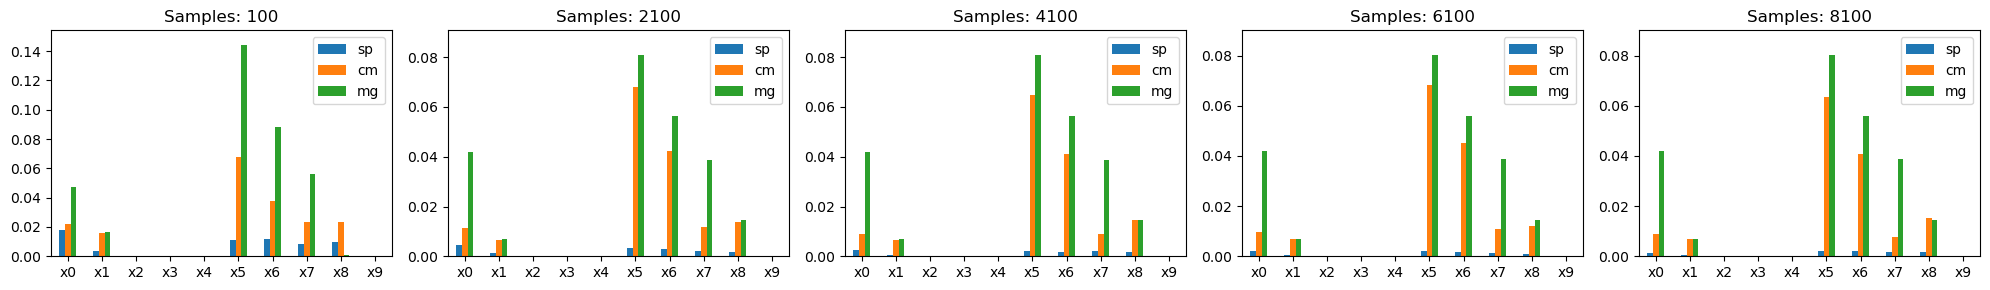

In [13]:
fig, axs = plt.subplots(1,len(num_samples),figsize=(20,3))
for (s,a) in zip(num_samples, axs):
    data = {b: [] for b in backends}
    for b in backends:
        data[b] = df_db_cacm[(df_db_cacm.samples == s) & (df_db_cacm.backend == b)].err_mean_mean.values
    df_temp = pd.DataFrame(data)
    ax = df_temp.plot.bar(ax=a)
    variables = df_db_cacm.var_name.unique()
    ax.set_xticks(range(len(variables)), variables,rotation=0)
    ax.set_ylim((0,np.max(df_temp.values+0.01)))
    ax.legend(['sp','cm','mg'])
    ax.set_title(f'Samples: {s}');

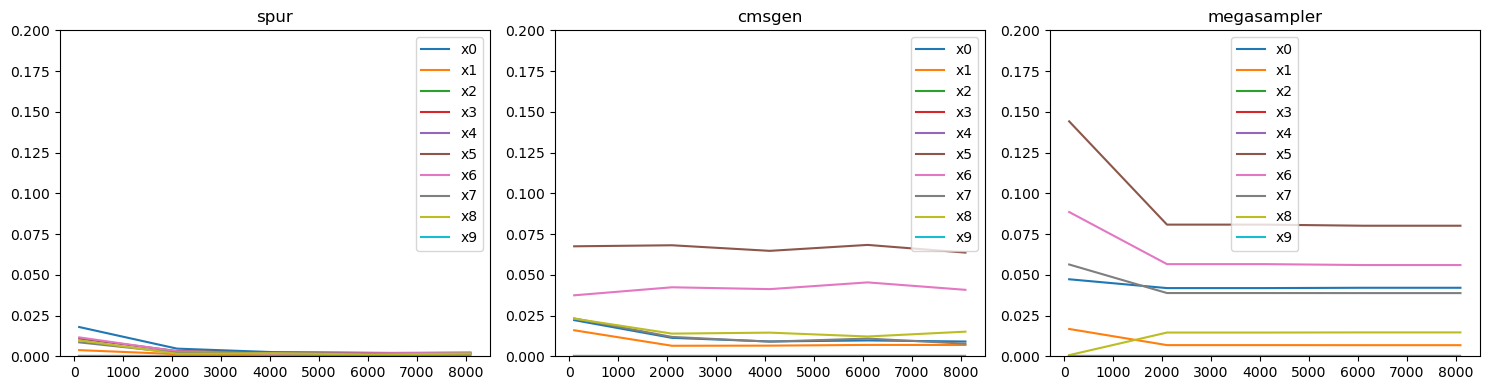

In [14]:
fig, axs = plt.subplots(1,len(backends),figsize=(15,4))

for (ax, b) in zip(axs, backends):
    ys = [(vn, 
           df_db_cacm[(df_db_cacm.var_name == vn) & (df_db_cacm.backend == b)].err_mean_mean.values,
           df_db_cacm[(df_db_cacm.var_name == vn) & (df_db_cacm.backend == b)].err_mean_var.values) 
              for vn in ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9']]
    for (vn, y, y_var) in ys:
        ax.plot(num_samples, y, label=vn)
        ax.fill_between(num_samples, y-y_var, y+y_var, alpha=0.2)
    ax.set_ylim((0,0.2))
    ax.set_title(f'{b}')
    ax.legend();

## NZ Stats

In [15]:
num_samples = np.arange(100, 10000, step=2000)
TIMEOUT = 60*10 # seconds (10min)

(g, num_bits, num_vars) = models.get_nz_stats_sat(
    path_to_dataset='sat/spur/nz_db/south_head.csv'
)
(s, num_vars) = models.get_nz_stats_smt(
    path_to_dataset='sat/spur/nz_db/south_head.csv'
)
backends = ['spur', 'cmsgen', 'megasampler']
traces_nz_stats = [
    (samples,
    [[mcmc.sample_mh_trace_from_z3_model(backend=backend,
                                       z3_problem=g,
                                       num_bits=num_bits,
                                       num_vars=num_vars,
                                       timeout_sampler=TIMEOUT,
                                       num_samples=samples)
    if backend in ['spur','cmsgen']
    else mcmc.sample_mh_trace_from_z3_model(
            backend=backend,
            z3_problem=s,
            timeout_sampler=TIMEOUT,
            reweight_samples=True,
            num_samples=samples)
    for rep in range(3)] for backend in backends])
    for samples in num_samples]

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	661/661/0
independent support size:  	0
clauses (all/long/binary/unit): 2025/1183/754/88
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	5511 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	5511 MB

Sample #1 of 2 is already a complete assignment.  Continuing...
Completing sample #2 of 2 which has 3 variables unset and 13 samples.
STAGE #2 - COMPLETE


variables (total / active / free)	661/661/0
clauses (removed) 		2025 (0)
decisions 				188
conflicts 				1
conflict clauses (all/bin/unit) 	30/19/88
failed literals found

### Convergence analysis

In [16]:
path_to_dataset = 'sat/spur/nz_db/south_head.csv'
south_head = pd.read_csv(path_to_dataset)
numpy_data = south_head.to_numpy()[:, 1:]

In [17]:
numpy_data

array([[3, 6, 6, 12, 9, 3, 9, 9, 6, 6, 15, 6, 3, 6, 3, 3, 0, 0, 0],
       [6, 0, 3, 6, 3, 6, 3, 9, 3, 6, 9, 6, 9, 3, 3, 3, 0, 0, 0],
       [15, 3, 12, 15, 15, 12, 9, 18, 9, 12, 21, 12, 12, 12, 6, 0, 0, 0,
        0]], dtype=object)

In [18]:
def get_values(x):
    upper_bound = x+2
    lower_bound = x-2 if x > 0 else 0
    return list(range(lower_bound,upper_bound+1))

In [19]:
p = lambda x: 1/5 if x > 0 else 1/3

In [20]:
unnorm_probs = [ [(i,j,p(numpy_data[0,k])*p(numpy_data[1,k])) 
   for i in get_values(numpy_data[0,k]) 
   for j in get_values(numpy_data[1,k])
   if (numpy_data[2,k] - 2) <= (i+j) <= (numpy_data[2,k] + 2)]
  for k in range(19)]

In [21]:
norm_probs = [[(x,y,prob1/sum([prob2 for (_,_,prob2) in i])) for (x,y,prob1) in i] for i in unnorm_probs]

In [22]:
p_var_nz_stats = lambda var_num, outcome: sum([t[2] for t in norm_probs[var_num%19] if t[int(var_num > 18)] == outcome])
p_var = lambda x,o: p_var_nz_stats(x,o)

In [24]:
def p_est(trace, var_name, outcome):
    return np.mean(trace[var_name] == outcome)
data_nz_stats = {
    'samples':  [],
    'backend':  [],
    'var_name': [],
    'err_mean_mean': [],
    'err_mean_var': []
}
for (samples, traces) in traces_nz_stats:
    for (backend, trace_reps) in zip(backends, traces):
        for x in [f'x{i}' for i in range(19*2)]:
            ## ranges are variable specific for NZ DB
            var_int_id = int(x[1:])
            ran = get_values(numpy_data[int(var_int_id > 18),(var_int_id%19)])
            outcomes = ran

            err_outcome_means = [np.mean([np.abs(p_est(trace.posterior.sel(chain=0), x, o).item() - p_var(var_int_id,o)) for o in outcomes]) for trace in trace_reps]
            data_nz_stats['samples'].append(samples)
            data_nz_stats['backend'].append(backend)
            data_nz_stats['var_name'].append(x)
            data_nz_stats['err_mean_mean'].append(np.mean(err_outcome_means))
            data_nz_stats['err_mean_var'].append(np.var(err_outcome_means))
df_nz_stats = pd.DataFrame(data_nz_stats)

In [25]:
df_nz_stats

,samples,backend,var_name,err_mean_mean,err_mean_var
0,100,spur,x0,0.000000,0.000000e+00
1,100,spur,x1,0.017333,1.422222e-05
2,100,spur,x2,0.028000,1.386667e-04
3,100,spur,x3,0.037333,5.688889e-05
4,100,spur,x4,0.022667,2.275556e-04
...,...,...,...,...,...
565,8100,megasampler,x33,0.147368,2.567907e-34
566,8100,megasampler,x34,0.000000,0.000000e+00
567,8100,megasampler,x35,0.112346,7.722400e-07
568,8100,megasampler,x36,0.111468,2.544027e-07


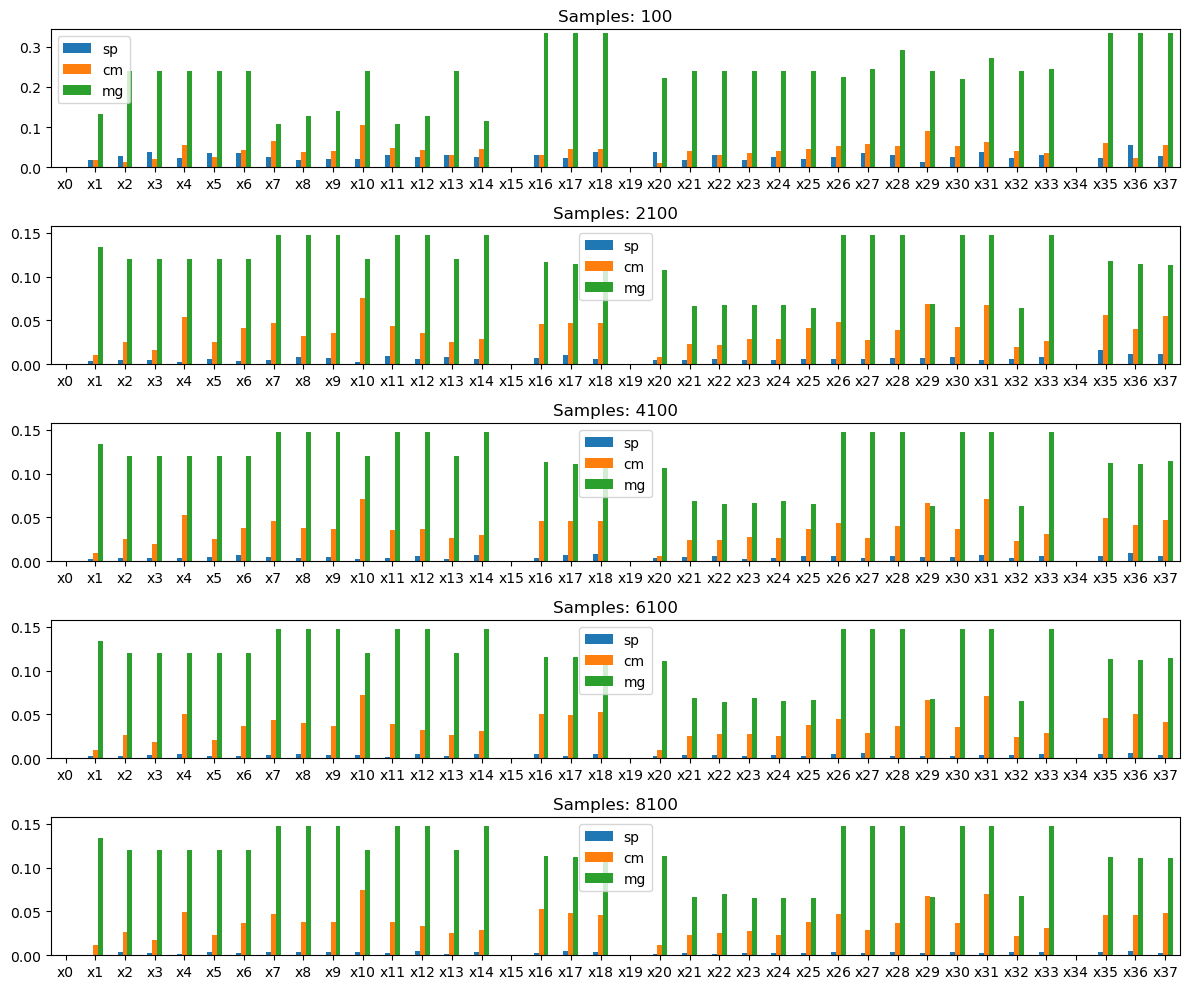

In [26]:
fig, axs = plt.subplots(len(num_samples),1,figsize=(12,10))
for (s,a) in zip(num_samples, axs):
    data = {b: [] for b in backends}
    for b in backends:
        data[b] = df_nz_stats[(df_nz_stats.samples == s) & (df_nz_stats.backend == b)].err_mean_mean.values
    df_temp = pd.DataFrame(data)
    ax = df_temp.plot.bar(ax=a)
    variables = df_nz_stats.var_name.unique()
    ax.set_xticks(range(len(variables)), variables,rotation=0)
    ax.set_ylim((0,np.max(df_temp.values+0.01)))
    ax.legend(['sp','cm','mg'])
    ax.set_title(f'Samples: {s}');

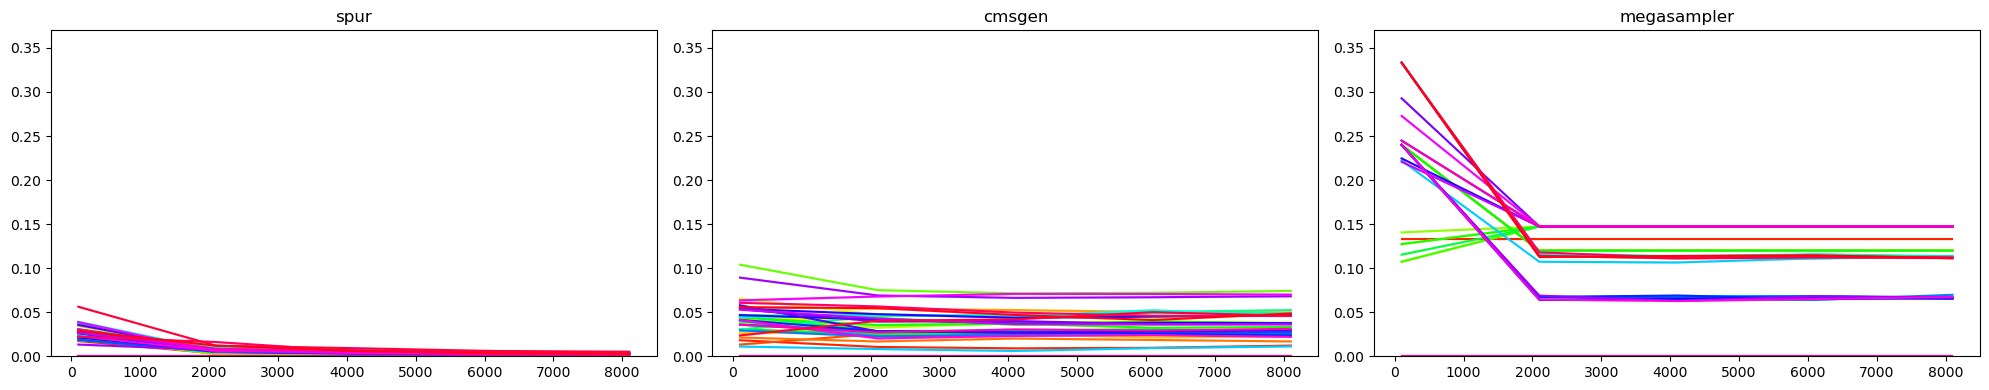

In [27]:
fig, axs = plt.subplots(1,len(backends),figsize=(20,4))

for (ax, b) in zip(axs, backends):
    ys = [(vn, 
           df_nz_stats[(df_nz_stats.var_name == vn) & (df_nz_stats.backend == b)].err_mean_mean.values,
           df_nz_stats[(df_nz_stats.var_name == vn) & (df_nz_stats.backend == b)].err_mean_var.values) 
              for vn in [f'x{i}' for i in range(19*2)]]
    for ((vn, y, y_var), c) in zip(ys,plt.cm.hsv(np.linspace(0, 1, len(ys)))):
        ax.plot(num_samples, y, color=c, label=vn)
        ax.fill_between(num_samples, y-y_var, y+y_var, color=c, alpha=0.2)
    ax.set_ylim((0,0.37))
    ax.set_title(f'{b}');
    # ax.legend(); # due to the large number of variables I set the legend off

## Roads

In [ ]:
num_samples = np.arange(100, 7001, step=1500)
TIMEOUT = 60*1 # seconds (10min)

# implicit 4 connections, and a reduction factor of 11 for the y values

(g, num_bits, num_vars) = models.get_roads_sat(num_bits = 7,
                                               max_int_bv = 2**5-1)
(s, num_vars) = models.get_roads_smt(max_int = 2**5-1)
backends = ['spur', 'cmsgen', 'megasampler']
traces_roads = [
    (samples,
    [[mcmc.sample_mh_trace_from_z3_model(backend=backend,
                                       z3_problem=g,
                                       num_bits=num_bits,
                                       num_vars=num_vars,
                                       timeout_sampler=TIMEOUT,
                                       num_samples=samples)
    if backend in ['spur','cmsgen']
    else mcmc.sample_mh_trace_from_z3_model(
            backend=backend,
            z3_problem=s,
            reweight_samples=True,
            timeout_sampler=TIMEOUT,
            num_samples=samples)
    for rep range(3)] for backend in backends])
    for samples in num_samples]

In [ ]:
az.plot_forest(traces_roads, combined=True, model_names=backends, hdi_prob=0.95, kind='ridgeplot', figsize=(7,7), ess=True);

## Books

In [ ]:
num_samples = np.arange(100, 7001, step=1500)
TIMEOUT = 60*10 # seconds (10min)

# implicit bound of 9, and a max_int of 86/6

(g, num_bits, num_vars) = models.get_books_sat()
(s, num_vars) = models.get_books_smt()

backends = ['spur', 'cmsgen']
# backends = ['spur', 'cmsgen', 'megasampler'] ## megasampler not working

traces_books = [
    (samples,
    [[mcmc.sample_mh_trace_from_z3_model(backend=backend,
                                       z3_problem=g,
                                       num_bits=num_bits,
                                       num_vars=num_vars,
                                       timeout_sampler=TIMEOUT,
                                       num_samples=samples)
    if backend in ['spur','cmsgen']
    else mcmc.sample_mh_trace_from_z3_model(
            backend=backend,
            z3_problem=s,
            reweight_samples=True,
            algo = 'MeGAb',
            timeout_sampler=TIMEOUT,
            num_samples=samples)
    for rep range(3)] for backend in backends])
    for samples in num_samples]

In [ ]:
az.plot_forest(traces_books, combined=True, model_names=backends, hdi_prob=0.95, kind='ridgeplot', figsize=(7,50), ess=True, ridgeplot_overlap=0.5);

## Haplotypes

The experiment below considers:
* 32 Haplotypes
* 5 placings in the haplotype ($2^5 = 32$)
* 100 genotypes

First, we generate a dataset of genotypes from a set of input
haplotype probabilities. The goal of the experiments is recovering
those probabilities after sampling.

In [ ]:
# config of the experiment
bits_per_haplotype = 5
num_haplotypes = 2**bits_per_haplotype
num_genotypes = 100

# list of distinct haplotypes
haplotypes = list(map(list, itertools.product([0, 1], repeat=bits_per_haplotype)))

# list of haplotypes probabilities
haplotypesProb = [
    0.0056,   0.004,                0.00368,  0.1,                 
    0.005681, 0.09,                 0.00468,  0.003,    
    0.08,     0.006147,             0.00595,  0.0071,   
    0.00345,  0.00632,              0.1,      0.0029,   
    0.0071,   0.006147,             0.085,    0.0045671,
    0.003379, 0.1,                  0.00461,  0.00614,             
    0.075,    0.08,                 0.00761,  0.004321, 
    0.09,     0.009217900000000112, 0.0134,   0.075]

# there must be a haplotype probability for each haplotype
if not (len(haplotypes) == len(haplotypesProb)):
    raise RuntimeError('The size of the list of haplotype probabilities does not match the list of distinct haplotypes')

# dict to store haplotype counts after sampling
haplotypesnumber = {}
for i in range(32):
    haplotypesnumber[str(haplotypes[i])] = 0

genotypes = []
d = {'h_1': [], 'h_2': [], 'g': []} # NOTE: added by Raúl

# seeds not working...
np.random.seed(2024)
random.seed(2024)

# we generate `num_genotypes` by sampling pairs of haplotypes according to their probabilities
for i in range(num_genotypes):
    h1 = np.random.choice(np.arange(num_haplotypes), p=haplotypesProb) # samples one haplotype (from 0 to 31) with probabilities above
    h2 = np.random.choice(np.arange(num_haplotypes), p=haplotypesProb) # samples one haplotype (from 0 to 31) with probabilities above
    genotypes.append(list(map(operator.add,haplotypes[h1],haplotypes[h2]))) # combines them to form a genotype
    d['h_1'].append(haplotypes[h1]); d['h_2'].append(haplotypes[h2]); d['g'].append(genotypes[i]); # NOTE: added by Raúl
    haplotypesnumber[str(haplotypes[h1])] = haplotypesnumber[str(haplotypes[h1])] + 1 # keeps count of sampled haplotypes 
    haplotypesnumber[str(haplotypes[h2])] = haplotypesnumber[str(haplotypes[h2])] + 1 # keeps count of sampled haplotypes 
df = pd.DataFrame(data=d)

In [ ]:
df

In [ ]:
TIMEOUT = 60*10 # seconds (10min)

(g, num_bits, num_vars) = models.get_haplotypes_sat(
    genotypes=np.array(genotypes)
)
(s, num_vars) = models.get_haplotypes_smt(
    genotypes=np.array(genotypes)
)
backends = ['spur', 'cmsgen', 'megasampler']
# traces_haplotypes = [ 
#     mcmc.sample_mh_trace_from_z3_model(backend=backend,
#                                        z3_problem=g,
#                                        num_bits=num_bits,
#                                        num_vars=num_vars,
#                                        num_samples=1000)
#     for backend in backends ]

traces_haplotypes = [ 
    mcmc.sample_mh_trace_from_z3_model(backend=backend,
                                       z3_problem=g,
                                       num_bits=num_bits,
                                       num_vars=num_vars,
                                       timeout_sampler=TIMEOUT,
                                       num_samples=1000)
    if backend in ['spur','cmsgen']
    else mcmc.sample_mh_trace_from_z3_model(
            backend=backend,
            z3_problem=s,
            reweight_samples=True,
            timeout_sampler=TIMEOUT,
            num_samples=1000)
    for backend in backends ]

In [ ]:
az.plot_forest(traces_haplotypes, combined=True, kind='ridgeplot', model_names=backends, var_names=[f'x{i}' for i in range(100)], ridgeplot_overlap=0.5,ess=True, figsize=(5,30));

In [ ]:
# compare posteriors variable by variable
for var in [f'x{i}' for i in range(1000)]:
    for j in range(3):
        t = traces_haplotypes[j].posterior[var]
        print(f'{var} | mean: {t.mean().item()} | HDI: {az.hdi(t)[var].to_numpy()} | {az.ess(t)[var].to_numpy()}')
    # t = traces_haplotypes[1].posterior[var]
    # print(f'{var} | mean: {t.mean().item()} | HDI: {az.hdi(t)[var].to_numpy()} | {az.ess(t)[var].to_numpy()}')
    print('--------------')

In [ ]:
def __get_distinct_haplotype_counts(trace, 
                                    var_names: list[str], 
                                    bits_per_haplotype: int):
    """
    Returns the count of each distinct sampled haplotype for the Bitvector specified by the variables in `var_names`
    Note: Try to reimplement this function more efficiently. The bottleneck seem to be the casting of integer lists to str
    """
    return np.unique(np.array([str(a).replace(" ", ", ") for a in trace.posterior[var_names].to_array().values.reshape(bits_per_haplotype,-1).T]), return_counts=True)

def get_count_haplotypes(trace, num_vars, haplotypes, bits_per_haplotype):
    """
    Returns a dictionary where keys are haplotypes and values are the counts of each haplotype in the trace.
    Note: It is computationally expensive due to the function `__get_distinct_haplotype_counts`.
    """
    # list of lists where each list contains the variables for each BitVector (to be used as indexes in the posterior trace)
    haplo_var_vectors = [[f'x{i+j}' for j in range(bits_per_haplotype) ] for i in np.arange(0,num_vars,step=bits_per_haplotype)]
    # list of pairs where the first element in each pair is list with
    # each distinct haplotype, and the second pair element is a list
    # with the counts of the corresponding haplotype
    counts_per_var_vector = [__get_distinct_haplotype_counts(trace, haplo_var_vector, bits_per_haplotype) for haplo_var_vector in haplo_var_vectors]
    # initilize a dict with distinct haplotypes as keys and values are counts of each haplotype (initially 0)
    haplotypesnumber_posterior = { str(haplotypes[i]): 0 for i in range(2**bits_per_haplotype) }
    # iterate over all haplotype counts for each BitVector, and add them to the dictionary above
    for i in counts_per_var_vector:
        num_distinct_haplotypes = len(i[0])
        for j in range(num_distinct_haplotypes):
            haplotypesnumber_posterior[i[0][j]] += i[1][j]
    # return dictionary with all counts
    return haplotypesnumber_posterior

def normalize_haplotypes_posterior(haplo_numbers):
    """
    Takes as input a dict with haplotypes as keys and their counts and values.
    Returns a similar dict where values is the probability of each haplotype (frequentist)
    """
    total = sum([haplo_numbers[x] for x in list(haplo_numbers.keys())])
    return { x: haplo_numbers[x]/total  for x in list(haplo_numbers.keys())}

get_values = lambda x: [x[k] for k in x.keys()]

In [ ]:
# time consuming
haplotypesnumber_posteriors = \
    [get_count_haplotypes(trace, num_vars, haplotypes, bits_per_haplotype)
     for trace in traces_haplotypes]

In [ ]:
# zipping posterior counts with their corresponding backend
sources = [(b,p) for b,p in zip(backends,haplotypesnumber_posteriors)]
# adding counts from the sample
sources.append(('sample',haplotypesnumber))
# normalizing counts to compute haplotypes frequencies (in a frequentist manner)
normalized_sources = [(b,get_values(normalize_haplotypes_posterior(d))) for (b,d) in sources]
# adding the ground truth (haplotype frequencies used to generate genotypes)
normalized_sources.append(('population', haplotypesProb))
# put all together in a dataframe
df_p = pd.DataFrame(data=dict(normalized_sources))
# plot it!
df_p.plot.bar(figsize=(15,4), edgecolor='black');